In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl
import pickle as pkl
import os, sys
import ROOT as rt
import seaborn as sns
import operator as op

/cvmfs/cdms.opensciencegrid.org/releases/centos7/V04-00/lib/python3.7/site-packages/datacat/model.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import OrderedDict, MutableMapping


Welcome to JupyROOT 6.22/00


In [65]:
import pandas as pd
from collections import Counter

In [2]:
base="/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged"

# series = {
#     '7hr' : '23231219_034952',
#     '6hr' : '23231219_110331'
    
# }

# lname = series
# filePath = {}

# for key in series.keys():
    
#     filePath[key] = '%s/Prompt_V04-15_P0.2.1_%s.root'%(base,series[key])
#     if(os.path.exists(filePath[key])):
#         print(key,' : ',filePath[key])
#     else:
#         print('not found: ',filePath[key])


        

series = ['23231221_015705','23231220_190923','23231220_122140','23231220_053358','23231220_012745',
         '23231219_184002','23231219_110331','23231219_034952','23231218_223530','23231218_190035',
         '23231218_152721','23231218_093255','23231217_212512','23231217_171613','23231217_135018']

filePath = []

for ser in series:
    
    fp = '%s/Prompt_V04-15_P0.2.1_%s.root'%(base,ser)
    if(os.path.exists(fp)):
        print(ser,' : ',fp)
        filePath.append(fp)
    else:
        print('not found: ',fp)

23231221_015705  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231221_015705.root
23231220_190923  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_190923.root
23231220_122140  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_122140.root
23231220_053358  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_053358.root
23231220_012745  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231220_012745.root
23231219_184002  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged/Prompt_V04-15_P0.2.1_23231219_184002.root
23231219_110331  :  /sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Su

In [3]:
# Get trees from RQ file

# RQ=[]
# for i,key in enumerate(series.keys()):
#     RQ.append(uproot.open(filePath[key])['rqDir/zip1']) 

# eventTree=[]
# for i,key in enumerate(series.keys()):
#     eventTree.append(uproot.open(filePath[key])['rqDir/eventTree']) 
    
RQ=[]
for i,ser in enumerate(series):
    RQ.append(uproot.open(filePath[i])['rqDir/zip1']) 

eventTree=[]
for i,ser in enumerate(series):
    eventTree.append(uproot.open(filePath[i])['rqDir/eventTree']) 
    
    
print('Done!')


Done!


In [4]:
#Load RQs from processed files
channels=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']

OFchiq={}
OFamps={}
OFdelay={}
OFamps0={}
OFnorms={}
OFbs={}
# for i,key in enumerate(series.keys()):
#     tc={}
#     ta={}
#     td={}
#     ta0={}
#     tn = {}
#     tbs = {}
#     for c in channels:
#         tc[c]=(RQ[i].array(c+"OFchisq"))
#         ta[c]=(RQ[i].array(c+"OFamps"))
#         ta0[c]=(RQ[i].array(c+"OFamps0"))
#         td[c]=(RQ[i].array(c+"OFdelay"))
#         if(c!='PT'):
#             tn[c] = (RQ[i].array(c+"norm"))
#             tbs[c] = (RQ[i].array(c+"bs"))
#     OFchiq[series[key]]=tc
#     OFamps[series[key]]=ta
#     OFamps0[series[key]]=ta0
#     OFdelay[series[key]]=td
#     OFnorms[series[key]]=tn
#     OFbs[series[key]]=tbs
    
for i,key in enumerate(series):
    tc={}
    ta={}
    td={}
    ta0={}
    tn = {}
    tbs = {}
    for c in channels:
        tc[c]=(RQ[i].array(c+"OFchisq"))
        ta[c]=(RQ[i].array(c+"OFamps"))
        ta0[c]=(RQ[i].array(c+"OFamps0"))
        td[c]=(RQ[i].array(c+"OFdelay"))
        if(c!='PT'):
            tn[c] = (RQ[i].array(c+"norm"))
            tbs[c] = (RQ[i].array(c+"bs"))
    OFchiq[key]=tc
    OFamps[key]=ta
    OFamps0[key]=ta0
    OFdelay[key]=td
    OFnorms[key]=tn
    OFbs[key]=tbs
    print('%s loaded'%(key))
    
        
print('Done!')

23231221_015705 loaded
23231220_190923 loaded
23231220_122140 loaded
23231220_053358 loaded
23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231218_093255 loaded
23231217_212512 loaded
23231217_171613 loaded
23231217_135018 loaded
Done!


In [22]:
idx = 0
eid = 3
key = series[idx]
OFamps[key]
ampl = []
del_ = []
print(len(OFamps[key]['PT']))
for c in channels:
    if(c == 'PT'):
        continue
    ampl.append(OFamps[key][c][eid]) 
    del_.append(OFdelay[key][c][eid])
print(ampl)
print(np.max(ampl))
print(np.argmax(ampl))
print(channels[np.argmax(ampl) + 1])
print("-----")
print(del_)
print(np.min(del_))
print(np.argmin(del_))
print(channels[np.argmin(del_) + 1])

366415
[3.269236587686246e-09, 5.630451953391313e-09, 1.0502422879436036e-08, 1.453126593599001e-09, 4.526888099986788e-09, 1.825175862595758e-09, 5.7089530972977275e-09, 3.822745027006509e-09, 4.13211674586044e-09, 4.9315351481684275e-09, 5.1293757461825456e-09, 2.4370320246966506e-09]
1.0502422879436036e-08
2
PCS1
-----
[4.6399999999999996e-05, -0.0001344, -0.0004768, 5.6e-05, -0.0007056, 2.4e-05, -0.0005088, -0.00044479999999999997, -0.0001808, -0.00045599999999999997, -0.00017439999999999998, -0.00044479999999999997]
-0.0007056
4
PES1


In [5]:
# calculate max amplitude & min delay for a given side
max_amp = {}
min_delay = {}
for idx, key in enumerate(series):
    tmax_amp = []
    tmin_del = []
    for eid in range(len(OFamps[key]['PT'])):
        t1 = []
        t2 = []
        for c in channels:
            if(c == 'PT'):
                continue
            t1.append(OFamps[key][c][eid])
            t2.append(OFdelay[key][c][eid])
        tmax = np.max(t1)
        tmaxarg = np.argmax(t1)
        tmin = np.min(t2)
        tminarg = np.argmin(t2)
        cmax = 'none'
        cmin = 'none'
        if(tmax > -999999.0):
            cmax = channels[tmaxarg + 1]
            cmin = channels[tminarg + 1]
        tmax_amp.append(cmax)
        tmin_del.append(cmin)
    max_amp[key] = np.array(tmax_amp)
    min_delay[key] = np.array(tmin_del)
    print('%s loaded'%(key))
       

23231221_015705 loaded
23231220_190923 loaded
23231220_122140 loaded
23231220_053358 loaded
23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231218_093255 loaded
23231217_212512 loaded
23231217_171613 loaded
23231217_135018 loaded


In [6]:
# calculate asymmetry paramtere (OFS1 - OFS2)/(OFS1 + OFS2)
asym_par = {}
for idx, key in enumerate(series):
    diff = []
    for eid in range(len(OFamps[key]['PT'])):
        
        s1 = OFamps[key]['PAS1'][eid] + OFamps[key]['PBS1'][eid] + OFamps[key]['PCS1'][eid] + OFamps[key]['PDS1'][eid] + OFamps[key]['PES1'][eid] + OFamps[key]['PFS1'][eid]
        s2 = OFamps[key]['PAS2'][eid] + OFamps[key]['PBS2'][eid] + OFamps[key]['PCS2'][eid] + OFamps[key]['PDS2'][eid] + OFamps[key]['PES2'][eid] + OFamps[key]['PFS2'][eid]
        diff.append((s1 - s2)/(s1 + s2))
    asym_par[key] = np.array(diff)
    print('%s done'%(key))
        

23231221_015705 done
23231220_190923 done
23231220_122140 done
23231220_053358 done
23231220_012745 done
23231219_184002 done
23231219_110331 done
23231219_034952 done
23231218_223530 done
23231218_190035 done
23231218_152721 done
23231218_093255 done
23231217_212512 done
23231217_171613 done
23231217_135018 done


In [7]:
# Get event info from processed files

TriggerTime=[]
TriggerType=[]
EventNumber=[]
TrigDet=[]
TriggerMask=[]
EventTime=[]
# for i,key in enumerate(series.keys()):
#     TriggerTime.append(eventTree[i].array("TriggerTime"))
#     TriggerType.append(eventTree[i].array("TriggerType"))
#     EventNumber.append(eventTree[i].array("EventNumber"))
#     TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
#     TriggerMask.append(eventTree[i].array("TriggerMask"))
#     EventTime.append(eventTree[i].array("EventTime"))

R2 = {} # Radial parameter for S2
R1 = {} # Radial parameter for S1
amp_diff = {}  
amp_diff_abs = {}
for i,key in enumerate(series):
    TriggerTime.append(eventTree[i].array("TriggerTime"))
    TriggerType.append(eventTree[i].array("TriggerType"))
    EventNumber.append(eventTree[i].array("EventNumber"))
    TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
    TriggerMask.append(eventTree[i].array("TriggerMask"))
    EventTime.append(eventTree[i].array("EventTime"))
    R2[key] = OFdelay[key]['PFS2'] - OFdelay[key]['PAS2']
    R1[key] = OFdelay[key]['PFS1'] - OFdelay[key]['PAS1']
    amp_diff[key] = (OFamps[key]['PFS2'] - OFamps[key]['PAS2'])/(OFamps[key]['PFS2'] + OFamps[key]['PAS2'])
    amp_diff_abs[key] = (OFamps[key]['PFS2'] - OFamps[key]['PAS2'])
    print('%s loaded'%(key))
print('Done!')

23231221_015705 loaded
23231220_190923 loaded
23231220_122140 loaded
23231220_053358 loaded
23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231218_093255 loaded
23231217_212512 loaded
23231217_171613 loaded
23231217_135018 loaded
Done!


In [8]:
#normalize radial variables
R2_norm = {} # Radial parameter for S2
R1_norm = {} # Radial parameter for S1
amp_diff_norm = {}  
amp_diff_abs_norm = {}
for i,key in enumerate(series):
    mean = np.mean(R2[key])
    R2_norm[key] = (R2[key]-mean)/mean
    mean = np.mean(R1[key])
    R1_norm[key] = (R1[key]-mean)/mean
    mean = np.mean(amp_diff[key])
    amp_diff_norm[key] = (amp_diff[key]-mean)/mean
    mean = np.mean(amp_diff_abs[key])
    amp_diff_abs_norm[key] = (amp_diff_abs[key]-mean)/mean
print('Done')

Done


23231221_015705


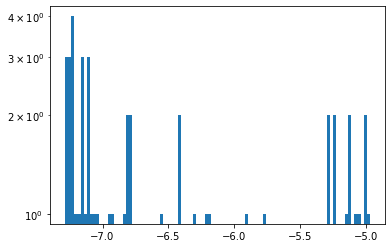

In [65]:
idx = 0
key = series[idx]
print(key)
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) #& (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
mask = mask & (max_amp[key] == 'PAS1')
plt.figure()
plt.hist(np.log10(OFamps[key]['PT'][mask]),bins = 100)
plt.yscale('log')
plt.show()

23231220_190923


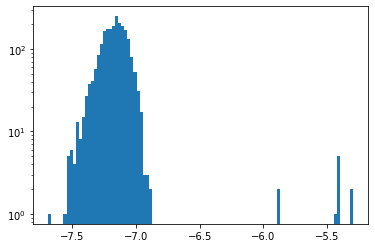

In [83]:
idx = 1
key = series[idx]
print(key)
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFchiq[key]['PT'] < 5e4) #& (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
mask = mask & (max_amp[key] == 'PFS2')
plt.figure()
plt.hist(np.log10(OFamps[key]['PT'][mask]),bins = 100)
plt.yscale('log')
plt.show()

23231220_190923
8.765953812402294e-10


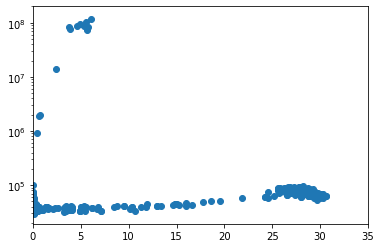

In [197]:
idx = 1
key = series[idx]
print(key)
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key]['PT'] > 0) #& (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
#mask = mask & (max_amp[key] == 'PFS1')
plt.figure()
plt.scatter((OFamps[key]['PT'][mask]*1e6).tolist(), (OFchiq[key]['PT'][mask]).tolist())
print(np.min(OFamps[key]['PT'][mask]))
plt.xlim(0,35)
#plt.hist(np.log10(OFamps[key]['PT'][mask]),bins = 100)
# plt.xscale('log')
plt.yscale('log')
plt.show()

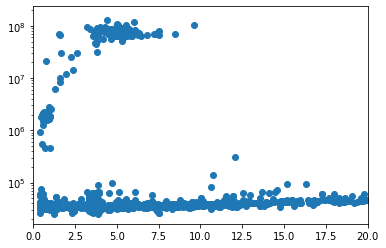

In [55]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par
for idx,key in enumerate(series):
    #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 6e-6) & (OFamps[key][chan] < 10.5e-6) & (abs(amp_diff_norm[key]) < 2)
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6)# & (OFamps[key][chan] < 10.5e-6) & (abs(amp_diff_norm[key]) < 2)
    x = np.append(x,OFamps[key]['PT'][mask]*1e6)
    y = np.append(y,OFchiq[key]['PT'][mask])
plt.figure()
plt.scatter(x.tolist(),y.tolist())#,range=[-2,2])
plt.yscale('log')
plt.xlim(0,20)
plt.show()


23231220_190923


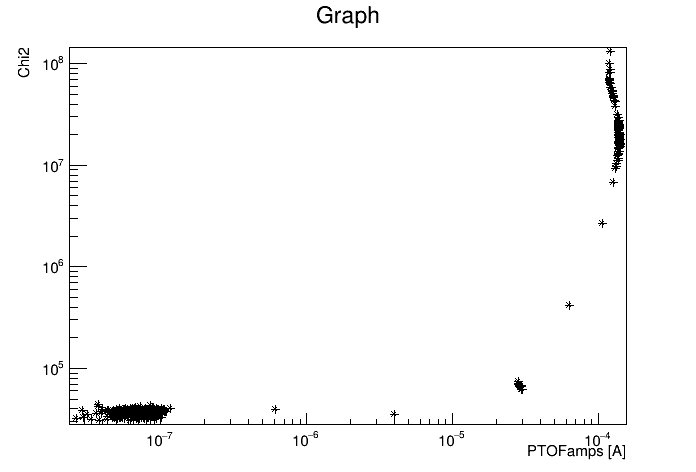

In [8]:
can = rt.TCanvas()
idx = 1
key = series[idx]
print(key)
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key]['PT'] > 0) #& (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
mask = mask & (max_amp[key] == 'PFS1')
x = (OFamps[key]['PT'][mask])#.tolist()
y = (OFchiq[key]['PT'][mask])#.tolist()
gr = rt.TGraph(len(x),x,y)
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Chi2')
gr.Draw('AP*')
can.SetLogy()
can.SetLogx()
can.Draw()

In [82]:
idx = 1
key = series[idx]
print(key)
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key]['PT'] > 0) #& (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
mask = mask & (OFamps[key]['PT'] < 1e-7)
EventNumber[idx][mask][:10].astype('int')

23231220_190923


array([30508, 30518, 30523, 30529, 30539, 30543, 30559, 30567, 30573,
       30583])

In [46]:
#print(np.sum((max_amp[key] == 'PFS1')))
max_amp[key] == 'none'

False

In [48]:
a = np.array([1,2,3,4,5,6])
a == 1

array([ True, False, False, False, False, False])

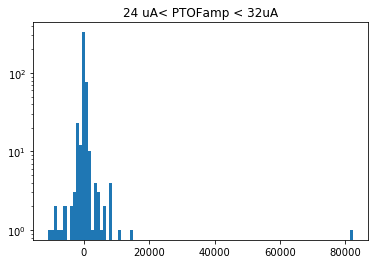

std dev =  4151.751421996736


In [14]:

chan = 'PT'
x = np.array([])
temp = R2_norm
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
    x = np.append(x,temp[key][mask])
plt.figure()
plt.hist(x,bins=100)#,range=[-2,2])
plt.yscale('log')
#plt.xlabel('PF - PA [s]')
plt.title('24 uA< PTOFamp < 32uA')
plt.show()
print('std dev = ',np.std(x))

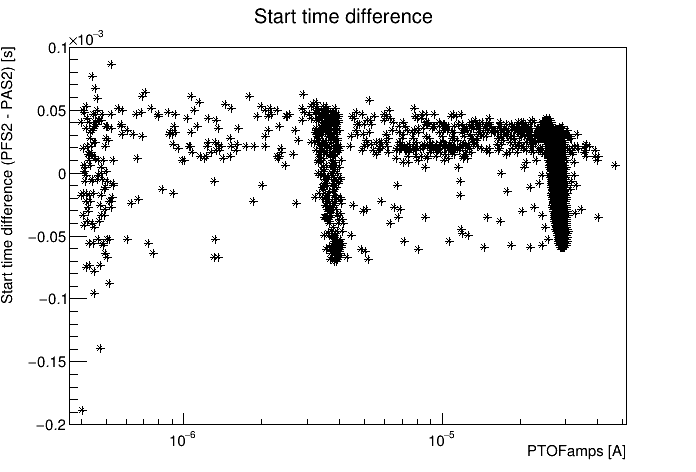

In [51]:
chan = 'PT'
x = np.array([])
y = np.array([])
#temp = amp_diff_norm
temp = R2
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 1e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.SetTitle('Start time difference')
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Start time difference (PFS2 - PAS2) [s]')
gr.Draw('AP*')
#can.SetLogy()
can.SetLogx()
gr.GetYaxis().SetRangeUser(-2e-4,1e-4)
can.Draw()

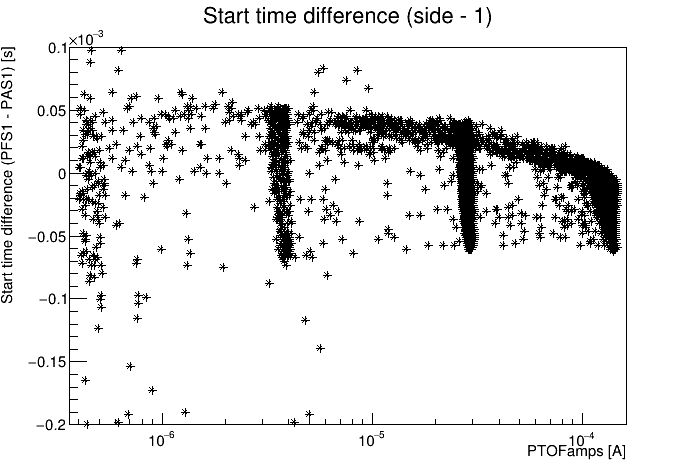

In [46]:
chan = 'PT'
x = np.array([])
y = np.array([])
#temp = amp_diff_norm
temp = R1
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) #& (OFamps[key][chan] < 5e-6)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.SetTitle('Start time difference (side - 1)')
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Start time difference (PFS1 - PAS1) [s]')
gr.Draw('AP*')
#can.SetLogy()

can.SetLogx()
gr.GetYaxis().SetRangeUser(-2e-4,1e-4)
can.Draw()

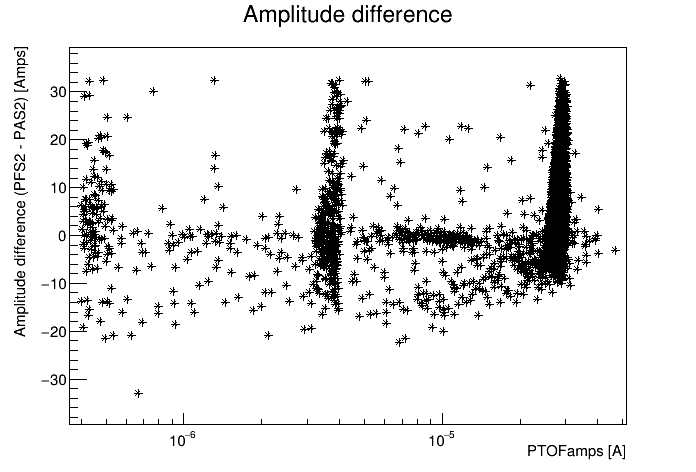

In [41]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = amp_diff_norm
#temp = R2
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 1e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

#can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('Amplitude difference')
gr.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2) [Amps]')
gr.Draw('AP*')
can.SetLogx()
can.Draw()

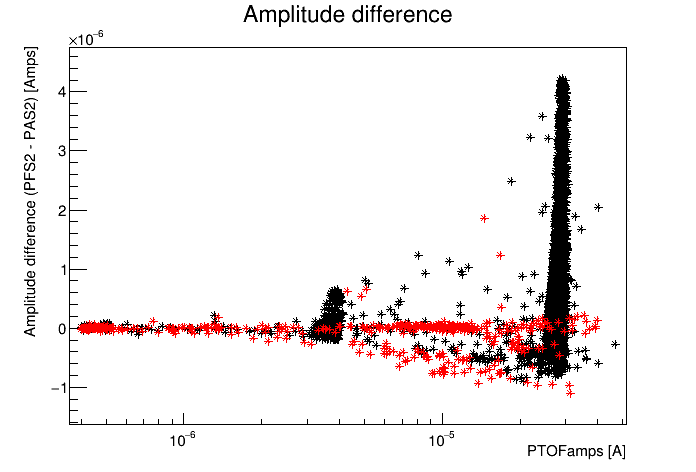

In [81]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = amp_diff_abs
#temp = R2
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6)  & (OFchiq[key][chan] < 1e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

#can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('Amplitude difference')
gr.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2) [Amps]')
gr.Draw('AP*')
#can.SetLogy()
x = np.array([])
y = np.array([])
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6)  & (OFchiq[key][chan] < 1e5)
    mask = mask & ((asym_par[key] < -0.09) | (asym_par[key] > 0.015))
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

#can = rt.TCanvas()
gr1 = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('Amplitude difference')
gr.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2) [Amps]')
gr1.SetMarkerColor(rt.kRed)
gr1.Draw('P* same')
#can.SetLogy()
can.SetLogx()
#gr.GetXaxis().SetRangeUser(1e-7,1e-6)
can.Draw()

can.SetLogx()
can.Draw()

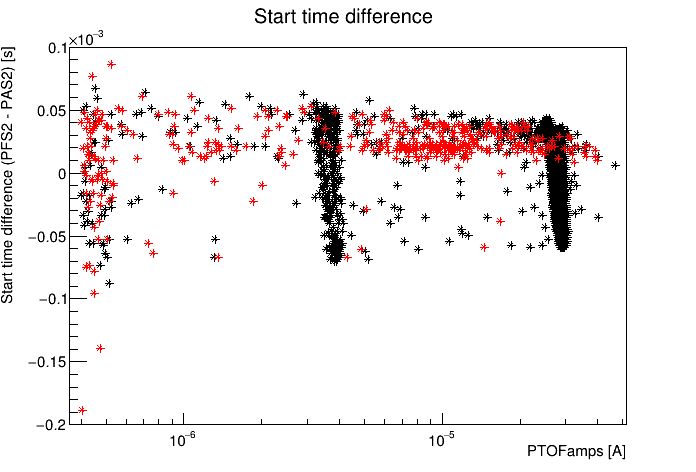

In [83]:
chan = 'PT'
x = np.array([])
y = np.array([])
#temp = amp_diff_abs
temp = R2
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6)  & (OFchiq[key][chan] < 1e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

#can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.SetTitle('Start time difference')
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Start time difference (PFS2 - PAS2) [s]')
gr.Draw('AP*')
#can.SetLogy()
x = np.array([])
y = np.array([])
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6)  & (OFchiq[key][chan] < 1e5)
    mask = mask & ((asym_par[key] < -0.09) | (asym_par[key] > 0.015))
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

#can = rt.TCanvas()
gr1 = rt.TGraph(len(x),(y),(x))
gr.SetTitle('Start time difference')
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Start time difference (PFS2 - PAS2) [s]')
gr1.SetMarkerColor(rt.kRed)
gr1.Draw('P* same')
#can.SetLogy()
can.SetLogx()
#gr.GetXaxis().SetRangeUser(1e-7,1e-6)
can.Draw()

can.SetLogx()
gr.GetYaxis().SetRangeUser(-2e-4,1e-4)
can.Draw()

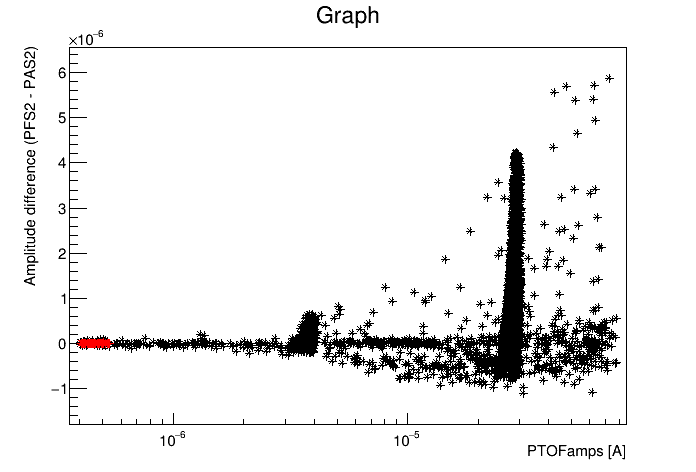

In [60]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = amp_diff_abs
#temp = R2
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

#can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2)')
gr.Draw('AP*')
#can.SetLogy()
x = np.array([])
y = np.array([])
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5) & (abs(asym_par[key]) > 0.5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

#can = rt.TCanvas()
gr1 = rt.TGraph(len(x),(y),(x))
gr1.GetXaxis().SetTitle('PTOFamps [A]')
gr1.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2)')
gr1.SetMarkerColor(rt.kRed)
gr1.Draw('P* same')
#can.SetLogy()
can.SetLogx()
#gr.GetXaxis().SetRangeUser(1e-7,1e-6)
can.Draw()

can.SetLogx()
can.Draw()

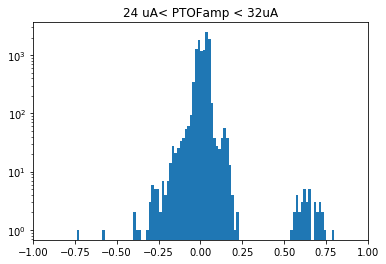

mean =  0.016213220821555248
std dev =  0.056983470807970296


In [50]:
chan = 'PT'
x = np.array([])
temp = asym_par
for idx,key in enumerate(series):
    #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 6e-6) & (OFamps[key][chan] < 10.5e-6) & (abs(amp_diff_norm[key]) < 2)
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6)# & (OFamps[key][chan] < 10.5e-6) & (abs(amp_diff_norm[key]) < 2)
    x = np.append(x,temp[key][mask])
plt.figure()
plt.hist(x,bins=100)#,range=[-2,2])
plt.yscale('log')
plt.xlim(-1,1)
#plt.xlabel('PF - PA [s]')
plt.title('24 uA< PTOFamp < 32uA')
plt.show()
print('mean = ',np.mean(x))
print('std dev = ',np.std(x))

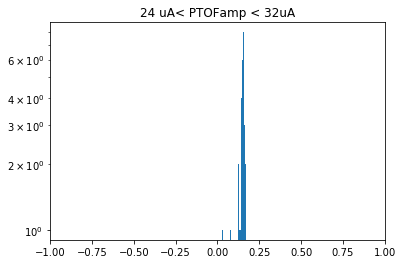

mean =  0.13688611133351652
std dev =  0.04088109370083052


In [44]:
chan = 'PT'
x = np.array([])
temp = asym_par
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 6e-6) & (OFamps[key][chan] < 10.5e-6) & (abs(amp_diff_norm[key]) < 2)
    #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.5e-6) & (OFamps[key][chan] < 0.8e-6)# & (abs(amp_diff_norm[key]) < 2)
    x = np.append(x,temp[key][mask])
plt.figure()
plt.hist(x,bins=100)#,range=[-2,2])
plt.yscale('log')
#plt.xlabel('PF - PA [s]')
plt.xlim(-1,1)
plt.title('24 uA< PTOFamp < 32uA')
plt.show()
print('mean = ',np.mean(x))
print('std dev = ',np.std(x))


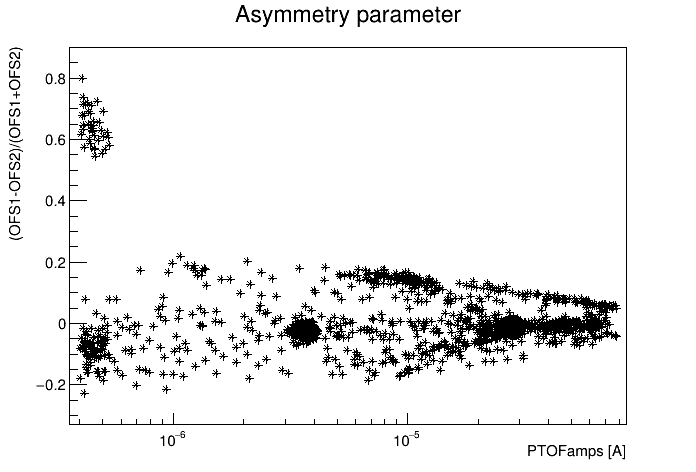

In [44]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 3)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('(OFS1-OFS2)/(OFS1+OFS2)')

gr.Draw('AP*')

can.SetLogx()
#gr.GetYaxis().SetRangeUser(-0.2,0.4)
#gr.GetXaxis().SetRangeUser(0.3e-6,8e-5)
l1 = rt.TLine(0.35e-6,0.015,8e-5,0.015)
l1.SetLineColor(rt.kRed)
l1.SetLineStyle(2)
l1.SetLineWidth(2)
#l1.Draw()
l2 = rt.TLine(0.35e-6,-0.09,8e-5,-0.09)
l2.SetLineColor(rt.kRed)
l2.SetLineStyle(2)
l2.SetLineWidth(2)
#l2.Draw()
can.Draw()

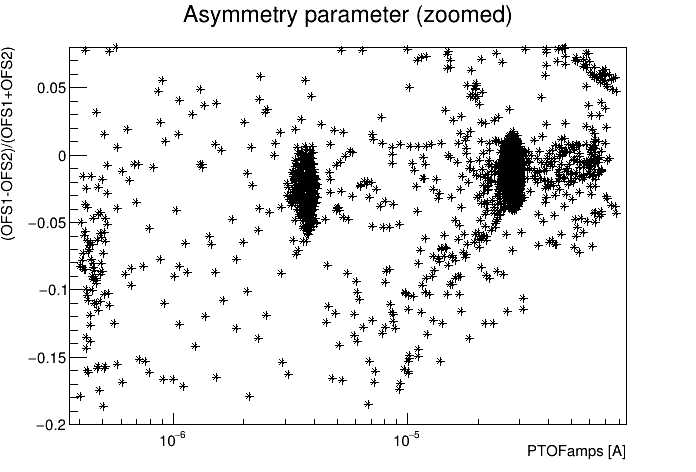

In [75]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 3)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('Asymmetry parameter (zoomed)')
gr.GetYaxis().SetTitle('(OFS1-OFS2)/(OFS1+OFS2)')

gr.Draw('AP*')

can.SetLogx()
gr.GetYaxis().SetRangeUser(-0.2,0.08)
#gr.GetXaxis().SetRangeUser(0.3e-6,8e-5)
l1 = rt.TLine(0.35e-6,0.015,8e-5,0.015)
l1.SetLineColor(rt.kRed)
l1.SetLineStyle(2)
l1.SetLineWidth(2)
#l1.Draw()
l2 = rt.TLine(0.35e-6,-0.09,8e-5,-0.09)
l2.SetLineColor(rt.kRed)
l2.SetLineStyle(2)
l2.SetLineWidth(2)
#l2.Draw()
can.Draw()

0  :  28
1  :  34
2  :  17
3  :  22
4  :  21
5  :  26
6  :  23
7  :  24
8  :  22
9  :  8
10  :  10
11  :  18
12  :  11
13  :  14
14  :  17


<Figure size 432x288 with 0 Axes>

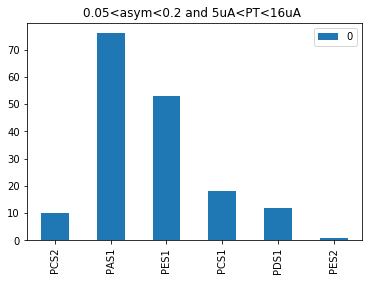

In [69]:

chan = 'PT'
x = np.array([])


#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 3)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & ((asym_par[key] > 0.05) & (asym_par[key] < 0.2)) 
    
    mask = mask & ((OFamps[key][chan] > 5e-6) & (OFamps[key][chan] < 2e-5))
    
    x = np.append(x,max_amp[key][mask])
plt.figure()
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',title="0.05<asym<0.2 and 5uA<PT<16uA ")
plt.show()

<Figure size 432x288 with 0 Axes>

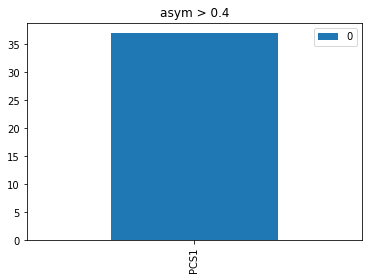

In [77]:

chan = 'PT'
x = np.array([])


#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 3)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & (asym_par[key] > 0.4)# & (asym_par[key] < 0.2))
    x = np.append(x,max_amp[key][mask])
plt.figure()
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',title="asym > 0.4")
plt.show()

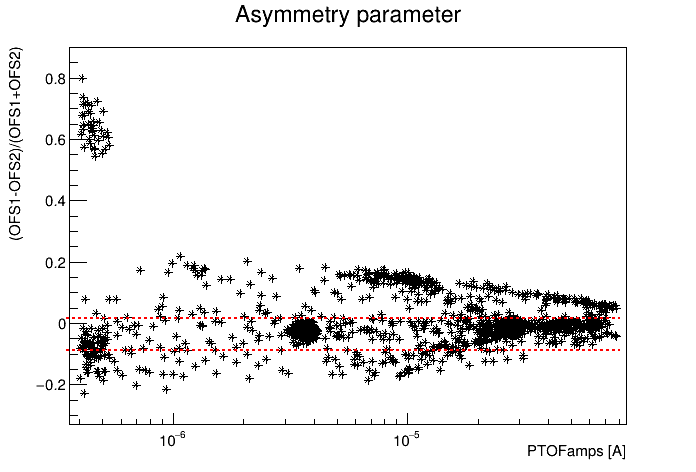

In [80]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 3)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('(OFS1-OFS2)/(OFS1+OFS2)')

gr.Draw('AP*')

can.SetLogx()
#gr.GetYaxis().SetRangeUser(-0.2,0.4)
#gr.GetXaxis().SetRangeUser(0.3e-6,8e-5)
l1 = rt.TLine(0.35e-6,0.015,8e-5,0.015)
l1.SetLineColor(rt.kRed)
l1.SetLineStyle(2)
l1.SetLineWidth(2)
l1.Draw()
l2 = rt.TLine(0.35e-6,-0.09,8e-5,-0.09)
l2.SetLineColor(rt.kRed)
l2.SetLineStyle(2)
l2.SetLineWidth(2)
l2.Draw()
can.Draw()

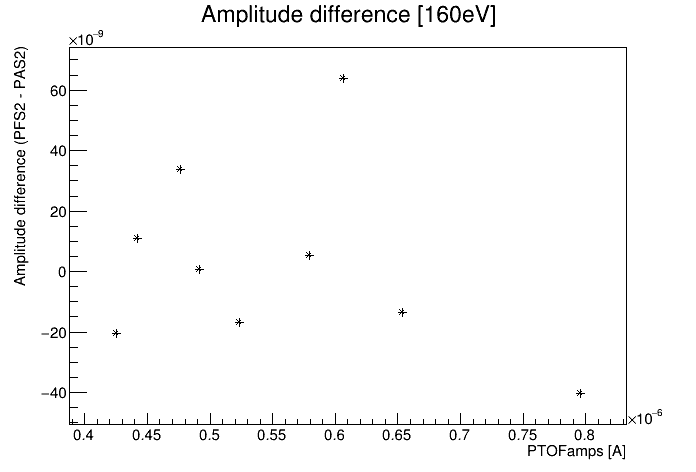

In [28]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = amp_diff_abs
#temp = R2
# for 160eV energy : asym_par cut = [-0.15,0] 
# for 1.30eV energy : asym_par cut = [-0.08,0.014] 
# for 10.3eV energy : asym_par cut = [-0.05,0.015] 
for idx,key in enumerate(series):
    if(not(idx == 1)):
        continue
    #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & ((max_amp[key] == 'PAS1') | (max_amp[key] == 'PAS2'))#& (OFamps[key][chan] < 5e-6)
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFamps[key][chan] < 0.8e-6) & (asym_par[key] >-0.15) & (asym_par[key] <0.)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.SetTitle('Amplitude difference [160eV]')
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2)')
gr.Draw('AP*')
#can.SetLogy()
#can.SetLogx()
can.Draw()

In [36]:
idx = 1
key = series[idx]
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFamps[key][chan] < 0.8e-6) & (asym_par[key] >-0.15) & (asym_par[key] <0.)
print('series = ',key)
for i in range(len(EventNumber[idx][mask])):
    print('%d = %d : %s : %f : %f : %f : '%(i, 
                                            EventNumber[idx][mask][i],
                                            max_amp[key][mask][i],
                                            amp_diff_abs[key][mask][i],
                                            R2[key][mask][i],
                                            
                                           ))
print('Events = ',EventNumber[idx][mask].astype(int))
print('Channel max = ',max_amp[key][mask])
print('Amp diff = ',amp_diff_abs[key][mask])
print('delay diff = ',R2[key][mask])
print('Asym_par diff = ',asym_par[key][mask])
print('PT  = ',OFamps[key]['PT'][mask])
print('chi2 diff = ',OFchiq[key]['PT'][mask])

series =  23231220_190923
Events =  [142222 190520 311981 371104 394145 523078 583078 600518 613262]
Channel max =  ['PES2' 'PFS1' 'PBS1' 'PES2' 'PCS2' 'PCS2' 'PCS2' 'PDS2' 'PCS2']
Amp diff =  [ 5.27726415e-10  6.38127227e-08  1.10855098e-08  3.39239920e-08
 -1.34158885e-08 -2.04113013e-08 -1.67753132e-08  5.19587442e-09
 -4.02712334e-08]
delay diff =  [-1.280e-05 -5.280e-05  3.488e-04 -7.360e-05  4.640e-05  4.320e-05
  4.640e-05  3.040e-05  4.480e-05]
Asym_par diff =  [-0.04251799 -0.01191956 -0.07305307 -0.06350598 -0.01873006 -0.09990038
 -0.00797003 -0.03991284 -0.05444129]


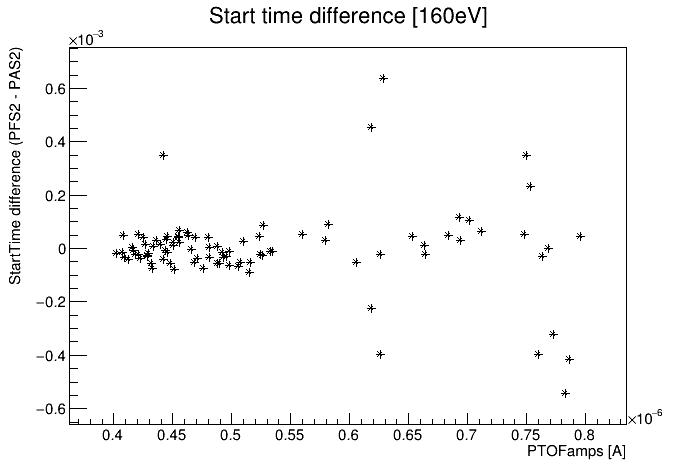

In [14]:
chan = 'PT'
x = np.array([])
y = np.array([])
#temp = amp_diff_abs
temp = R2
# for 160eV energy : asym_par cut = [-0.15,0] 
# for 1.30eV energy : asym_par cut = [-0.08,0.014] 
# for 10.3eV energy : asym_par cut = [-0.05,0.015] 
for idx,key in enumerate(series):
    #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & ((max_amp[key] == 'PAS1') | (max_amp[key] == 'PAS2'))#& (OFamps[key][chan] < 5e-6)
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFamps[key][chan] < 0.8e-6) & (asym_par[key] >-0.15) & (asym_par[key] <0.)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.SetTitle('Start time difference [160eV]')
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('StartTime difference (PFS2 - PAS2)')
gr.Draw('AP*')

#can.SetLogy()
#can.SetLogx()
can.Draw()

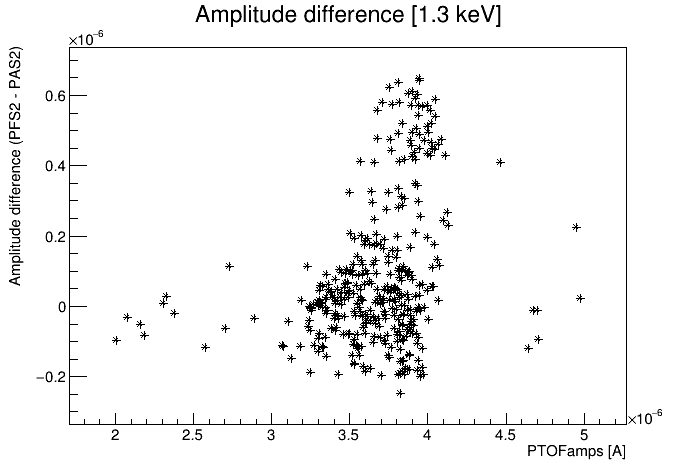

In [11]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = amp_diff_abs
#temp = R2
# for 160eV energy : asym_par cut = [-0.15,0] 
# for 1.30eV energy : asym_par cut = [-0.08,0.014] 
# for 10.3eV energy : asym_par cut = [-0.05,0.015] 
for idx,key in enumerate(series):
    #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & ((max_amp[key] == 'PAS1') | (max_amp[key] == 'PAS2'))#& (OFamps[key][chan] < 5e-6)
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6) & (asym_par[key] >-0.08) & (asym_par[key] <0.014)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.SetTitle('Amplitude difference [1.3 keV]')
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2)')
gr.Draw('AP*')
#can.SetLogy()
#can.SetLogx()
can.Draw()

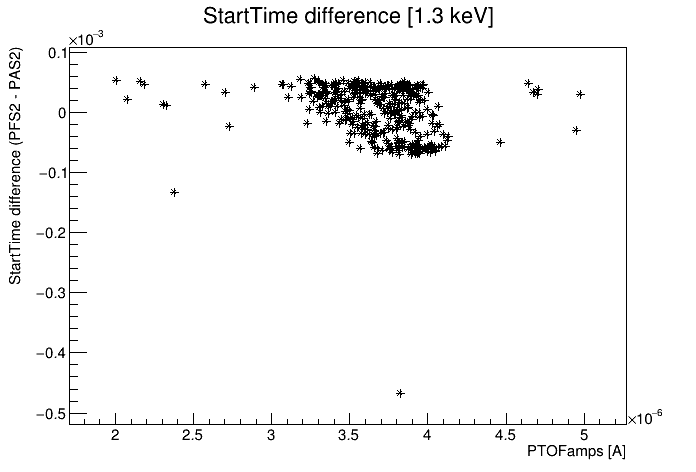

In [13]:
chan = 'PT'
x = np.array([])
y = np.array([])
#temp = amp_diff_abs
temp = R2
# for 160eV energy : asym_par cut = [-0.15,0] 
# for 1.30eV energy : asym_par cut = [-0.08,0.014] 
# for 10.3eV energy : asym_par cut = [-0.05,0.015] 
for idx,key in enumerate(series):
    #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & ((max_amp[key] == 'PAS1') | (max_amp[key] == 'PAS2'))#& (OFamps[key][chan] < 5e-6)
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6) & (asym_par[key] >-0.08) & (asym_par[key] <0.014)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.SetTitle('StartTime difference [1.3 keV]')
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('StartTime difference (PFS2 - PAS2)')
gr.Draw('AP*')
#can.SetLogy()
#can.SetLogx()
can.Draw()

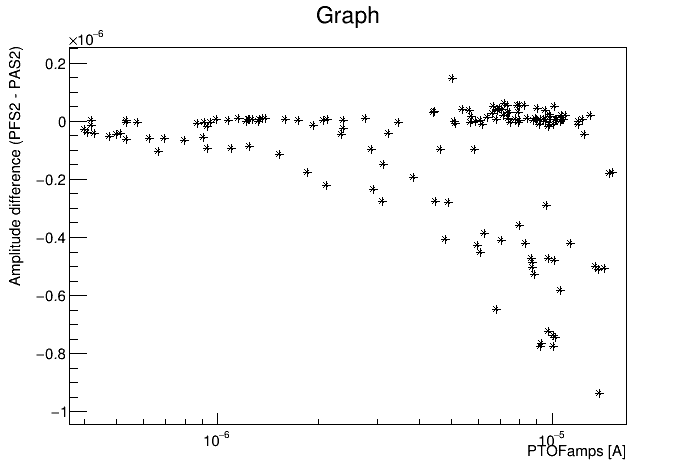

In [11]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = amp_diff_abs
#temp = R2
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & ((max_amp[key] == 'PAS1') | (max_amp[key] == 'PAS2'))#& (OFamps[key][chan] < 5e-6)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2)')
gr.Draw('AP*')
#can.SetLogy()
can.SetLogx()
can.Draw()

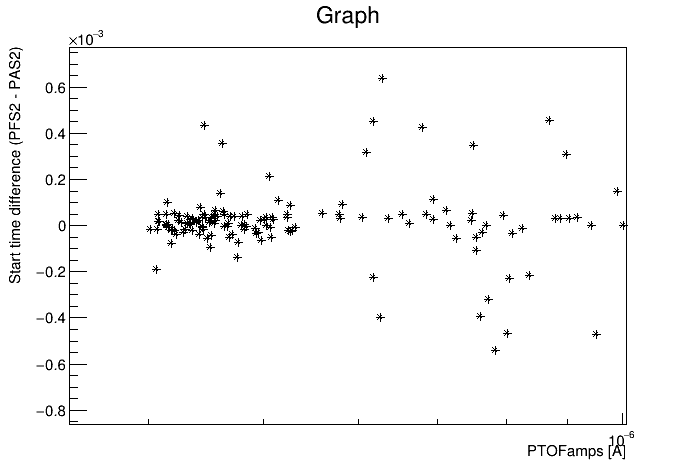

In [48]:
chan = 'PT'
x = np.array([])
y = np.array([])
#temp = amp_diff_abs
temp = R2
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & ((max_amp[key] == 'PCS1') | (max_amp[key] == 'PCS2') | (max_amp[key] == 'PDS1') | (max_amp[key] == 'PDS2') | (max_amp[key] == 'PES1') | (max_amp[key] == 'PES2'))#& (OFamps[key][chan] < 5e-6)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))

gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Start time difference (PFS2 - PAS2)')
gr.Draw('AP*')

#can.SetLogy()
can.SetLogx()
gr.GetXaxis().SetRangeUser(1e-7,1e-6)
#gr.GetYaxis().SetRangeUser(-1e-7,1e-7)
can.Draw()

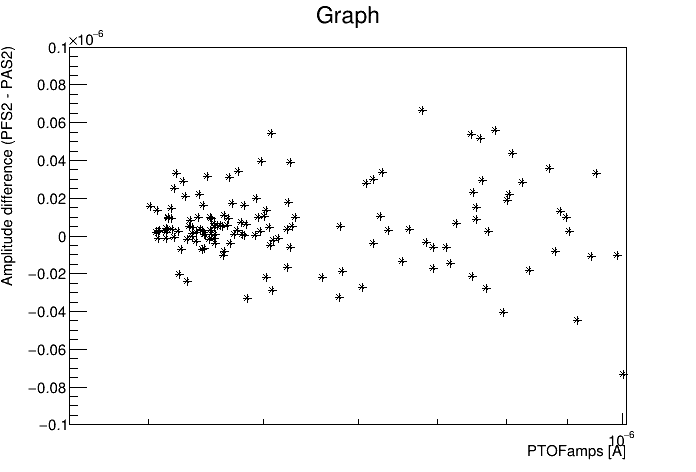

In [14]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = amp_diff_abs
#temp = R2
for idx,key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & ((max_amp[key] == 'PCS1') | (max_amp[key] == 'PCS2') | (max_amp[key] == 'PDS1') | (max_amp[key] == 'PDS2') | (max_amp[key] == 'PES1') | (max_amp[key] == 'PES2'))#& (OFamps[key][chan] < 5e-6)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.GetYaxis().SetTitle('Amplitude difference (PFS2 - PAS2)')

gr.Draw('AP*')

#can.SetLogy()
can.SetLogx()
gr.GetXaxis().SetRangeUser(0,1e-6)
gr.GetYaxis().SetRangeUser(-1e-7,1e-7)
can.Draw()

In [179]:
idx = 0
key = series[idx]
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & ((max_amp[key] == 'PCS1') | (max_amp[key] == 'PCS2') | (max_amp[key] == 'PDS1') | (max_amp[key] == 'PDS2') | (max_amp[key] == 'PES1') | (max_amp[key] == 'PES2'))#& (OFamps[key][chan] < 5e-6)
eid = 0
print(time_differences(idx, key, mask, 0, 'S1'))
print(time_differences(idx, key, mask, 0, 'S2'))

[2.3999999999999987e-05, 1.2799999999999986e-05, 2.3999999999999987e-05, 2.2400000000000002e-05, -2.0800000000000018e-05]
[1.919999999999998e-05, 9.600000000000017e-06, 1.5999999999999847e-06, -2.5600000000000026e-05, 3.3600000000000004e-05]


In [177]:
def time_differences(idx, key, mask, eid, s):
    t = []
    t.append((OFdelay[key]['PA'+s][mask][eid]) - (OFdelay[key]['PF'+s][mask][eid]))
    t.append((OFdelay[key]['PB'+s][mask][eid]) - (OFdelay[key]['PF'+s][mask][eid]))
    t.append((OFdelay[key]['PC'+s][mask][eid]) - (OFdelay[key]['PF'+s][mask][eid]))
    t.append((OFdelay[key]['PD'+s][mask][eid]) - (OFdelay[key]['PF'+s][mask][eid]))
    t.append((OFdelay[key]['PE'+s][mask][eid]) - (OFdelay[key]['PF'+s][mask][eid]))
    return(t)

In [84]:
h_pt = rt.TH1F('h_pt','h_pt',550,0,55)
h_pt.GetXaxis().SetTitle('PTOFamp [uA]')
h_pt.GetYaxis().SetTitle('Counts')

h_pt_rcut = rt.TH1F('h_pt_rcut','h_pt_rcut',550,0,55)
h_pt_rcut.GetXaxis().SetTitle('PTOFamp [uA]')
h_pt_rcut.GetYaxis().SetTitle('Counts')

h_pt_ampcut = rt.TH1F('h_pt_ampcut','h_pt_ampcut',550,0,55)
h_pt_ampcut.GetXaxis().SetTitle('PTOFamp [uA]')
h_pt_ampcut.GetYaxis().SetTitle('Counts')

h_pt_log = rt.TH1F('h_pt_log','h_pt_log',240,-8,-4)
h_pt_log.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log.GetYaxis().SetTitle('Counts')

h_pt_log_asym_cut = rt.TH1F('h_pt_log_asym_cut','h_pt_log_asym_cut',240,-8,-4)
h_pt_log_asym_cut.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log_asym_cut.GetYaxis().SetTitle('Counts')
h_pt_log_asym_cut_notA = rt.TH1F('h_pt_log_asym_cut_notA','h_pt_log_asym_cut_notA',240,-8,-4)
h_pt_log_asym_cut_notA.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log_asym_cut_notA.GetYaxis().SetTitle('Counts')

h_pt_log_rcut = rt.TH1F('h_pt_log_rcut','h_pt_log_rcut',240,-8,-4)
h_pt_log_rcut.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log_rcut.GetYaxis().SetTitle('Counts')

h_pt_log_ampcut = rt.TH1F('h_pt_log_ampcut','h_pt_log_ampcut',240,-8,-4)
h_pt_log_ampcut.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log_ampcut.GetYaxis().SetTitle('Counts')

h_pt_log_PFmax = rt.TH1F('h_pt_log_PFmax','h_pt_log_PFmax',240,-8,-4)
h_pt_log_PFmax.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log_PFmax.GetYaxis().SetTitle('Counts')

h_pt_log_PAmax = rt.TH1F('h_pt_log_PAmax','h_pt_log_PAmax',240,-8,-4)
h_pt_log_PAmax.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log_PAmax.GetYaxis().SetTitle('Counts')

h_pt_log_PBmax = rt.TH1F('h_pt_log_PBmax','h_pt_log_PBmax',240,-8,-4)
h_pt_log_PBmax.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log_PBmax.GetYaxis().SetTitle('Counts')

h_pt_log_CDEmax = rt.TH1F('h_pt_log_CDEmax','h_pt_log_CDEmax',240,-8,-4)
h_pt_log_CDEmax.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log_CDEmax.GetYaxis().SetTitle('Counts')

h_R1 = rt.TH1F('h_R1','h_R1',100,-11e-5,10e-5)
h_R1.GetXaxis().SetTitle('OFdelay(PFS1 - PAS1) [s] ')

h_R2 = rt.TH1F('h_R2','h_R2',100,-11e-5,10e-5)
h_R2.GetXaxis().SetTitle('OFdelay(PFS2 - PAS2) [s] ')


h_2D_R1_OF = rt.TH2F('h_2D_R1_OF','h_2D_R1_OF',500,-6.6,-4,100,-11e-5,10e-5)
h_2D_R1_OF.GetXaxis().SetTitle('log10(PTOFamp)')
h_2D_R1_OF.GetYaxis().SetTitle('S1 (PF-PA) delay [s]')

h_2D_R2_OF = rt.TH2F('h_2D_R2_OF','h_2D_R2_OF',500,-6.6,-4,100,-11e-5,10e-5)
h_2D_R2_OF.GetXaxis().SetTitle('log10(PTOFamp)')
h_2D_R2_OF.GetYaxis().SetTitle('S2 (PF-PA) delay [s]')

#h_2D_amp_OF = rt.TH2F('h_2D_amp_OF','h_2D_amp_OF',)


h_delta_S1_S2 = rt.TH1F('h_delta_S1_S2','h_delta_S1_S2',400,-20e-6,20e-6)
h_delta_S1_S2.GetXaxis().SetTitle('S1 - S2 delay')

chan = 'PT'
cnt_all = 0
cnt_AB = 0
cnt_CDE = 0
cnt_F = 0
cnt_others = 0
for idx, key in enumerate(series):
#     if(idx != 1):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) #& (OFamps[key][chan] > 1e-6) # & (OFchiq[series[key]][chan] < 1.e5)
    x = OFamps[key][chan][mask]
    r1 = R1[key][mask]
    r2 = R2[key][mask]
    ad = amp_diff[key][mask]
    eid = EventNumber[idx][mask]
    ma = max_amp[key][mask]
    delay_ = OFdelay[key][chan][mask]
    asym = asym_par[key][mask]
    chi2 = OFchiq[key][chan][mask]
#     print(len(x))
#     print(len(r1))
#     print(len(r2))
#     break
    for i,value in enumerate(x):
        if(chi2[i] > 5e5):
            continue
        if(value > 0.3e-6):
            h_pt.Fill(value*1e6)
            if(r2[i] < -4e-5):
                h_pt_rcut.Fill(value*1e6)
                
            if(ad[i] > 0.2):
                h_pt_ampcut.Fill(value*1e6)
            
        if(value > 0.5e-6 and value < 0.8e-6):            
            h_R1.Fill(r1[i])
            h_R2.Fill(r2[i])
            cnt_all += 1
            if(('PA' in ma[i]) or ('PB' in ma[i])):
                cnt_AB += 1
            elif(('PC' in ma[i]) or ('PD' in ma[i]) or ('PE' in ma[i])):
                cnt_CDE += 1
            elif('PF' in ma[i]):
                cnt_F += 1
            else:
                cnt_others += 1
                print(eid[i],':',max_amp[key][i])
        h_pt_log.Fill(np.log10(value))
        
        if(r2[i] < -4e-5):
            h_pt_log_rcut.Fill(np.log10(value))
        if(ad[i] > 0.2):
            h_pt_log_ampcut.Fill(np.log10(value))
        if('PF' in max_amp[key][i]):
            h_pt_log_PFmax.Fill(np.log10(value))
            
        if('PA' in ma[i]):
            h_pt_log_PAmax.Fill(np.log10(value))
        if(('PCS1' in ma[i]) or ('PD' in ma[i]) or ('PE' in ma[i])):
            h_pt_log_CDEmax.Fill(np.log10(value))
        if('PB' in ma[i]):
            h_pt_log_PBmax.Fill(np.log10(value))
        
        if(asym[i] < 0.015 and asym[i] > -0.09):
            h_pt_log_asym_cut.Fill(np.log10(value))
            if('PA' not in ma[i]):
                h_pt_log_asym_cut_notA.Fill(np.log10(value))
        h_2D_R1_OF.Fill(np.log10(value),r1[i])
        h_2D_R2_OF.Fill(np.log10(value),r2[i])
    print('%s loaded'%(key))
print('Done!')
print('cnt_all = ',cnt_all)
print('cnt_AB = ',cnt_AB)
print('cnt_CDE = ',cnt_CDE)
print('cnt_F = ',cnt_F)
print('cnt_others = ',cnt_others)
print('cnt_AB + cnt_CDE + cnt_F = ',(cnt_AB + cnt_CDE + cnt_F))

/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:133: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:137: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:123: RuntimeWarnin

23231221_015705 loaded
23231220_190923 loaded
23231220_122140 loaded
23231220_053358 loaded
23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231218_093255 loaded
23231217_212512 loaded
23231217_171613 loaded
23231217_135018 loaded
Done!
cnt_all =  46
cnt_AB =  8
cnt_CDE =  31
cnt_F =  7
cnt_others =  0
cnt_AB + cnt_CDE + cnt_F =  46


In [118]:
idx = 0
key = series[idx]
eid = 200583
mask = (EventNumber[idx] == eid)
[OFamps[key][c][mask] for c in channels]
max_amp[key][mask]

array(['PCS2'], dtype='<U4')

Warning in <TH1F::Rebin>: ngroup=2 is not an exact divider of nbins=275.
Warning in <TH1F::Rebin>: ngroup=2 is not an exact divider of nbins=275.


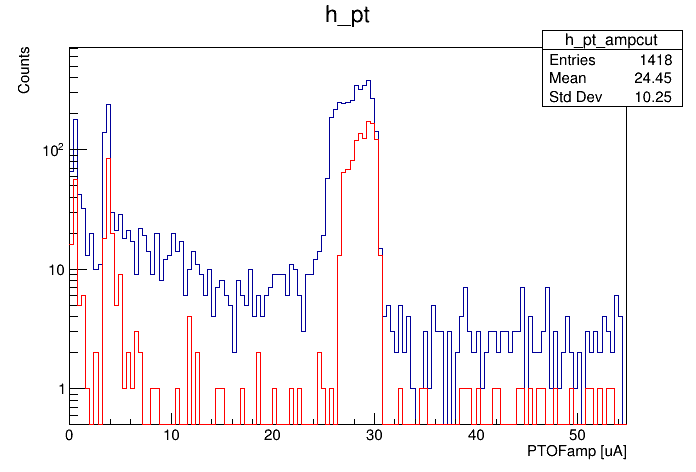

In [26]:
can = rt.TCanvas()
h_pt.Rebin(2)
h_pt.Draw()
h_pt_ampcut.SetLineColor(rt.kRed)
h_pt_ampcut.Rebin(2)
h_pt_ampcut.Draw('sames')
can.SetLogy()
can.Draw()

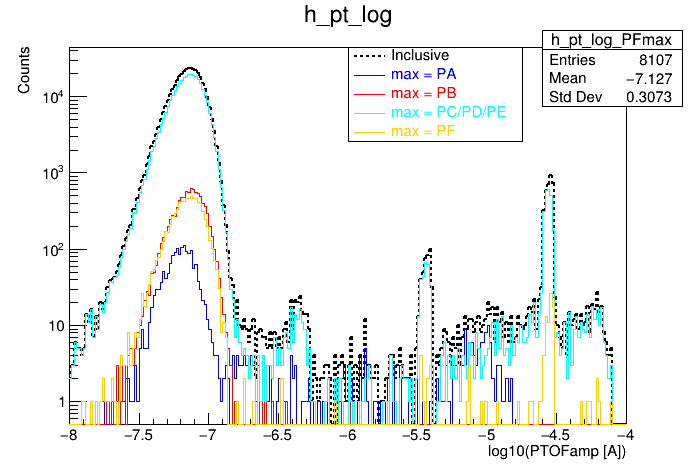

In [87]:
hists = []
hists.append(h_pt_log.Clone())
hists.append(h_pt_log_PAmax.Clone())
hists.append(h_pt_log_PBmax.Clone())
hists.append(h_pt_log_CDEmax.Clone())
hists.append(h_pt_log_PFmax.Clone())

line_color = [rt.kBlack, rt.kBlue, rt.kRed, rt.kCyan, rt.kOrange]
line_style = [2, 1, 1, 1, 1]
line_width = [2, 1, 1, 1, 1]
ltext = ['Inclusive','max = PA','max = PB','max = PC/PD/PE','max = PF']
legend = rt.TLegend(0.5,0.9,0.75,0.7)
legend.SetTextSize(0.035)
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    #hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    if(i == 0):
        hist.Draw('hist')
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
can.SetLogy()
legend.Draw()
can.Draw()   

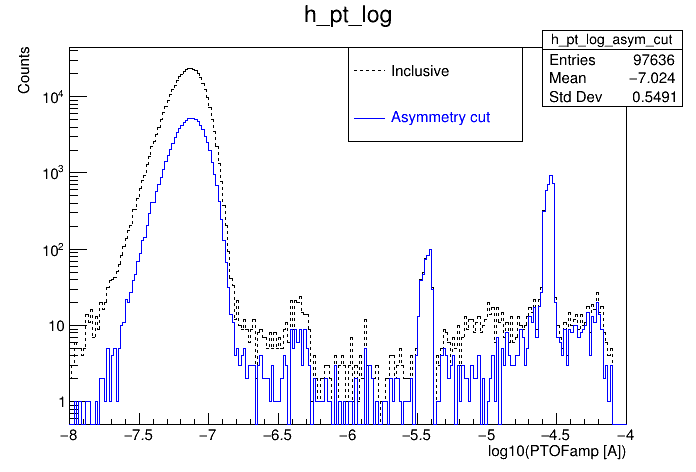

In [86]:
hists = []
hists.append(h_pt_log.Clone())
hists.append(h_pt_log_asym_cut.Clone())

#hists.append(h_pt_log_asym_cut_notA.Clone())


line_color = [rt.kBlack, rt.kBlue, rt.kRed, rt.kCyan, rt.kOrange]
line_style = [2, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1]
ltext = ['Inclusive','Asymmetry cut','+ not PA max','max = PC/PD/PE','max = PF']
legend = rt.TLegend(0.5,0.9,0.75,0.7)
legend.SetTextSize(0.035)
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    #hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    if(i == 0):
        hist.Draw('hist')
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
can.SetLogy()
legend.Draw()
can.Draw()   

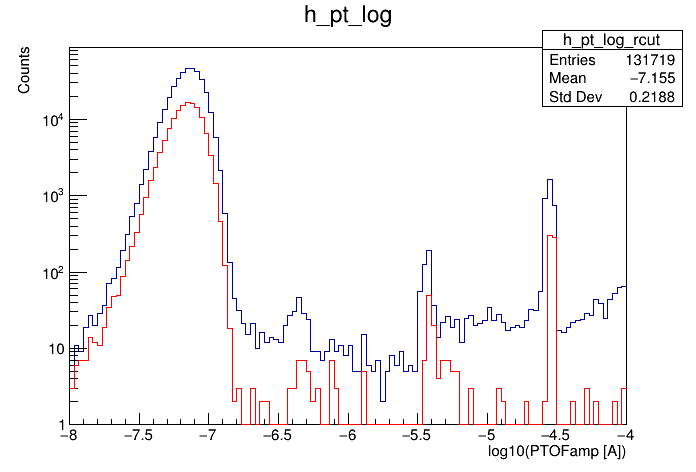

In [23]:
can = rt.TCanvas()
h_pt_log.Draw()
h_pt_log_rcut.SetLineColor(rt.kRed)
h_pt_log_rcut.Draw('sames')
can.SetLogy()
can.Draw()

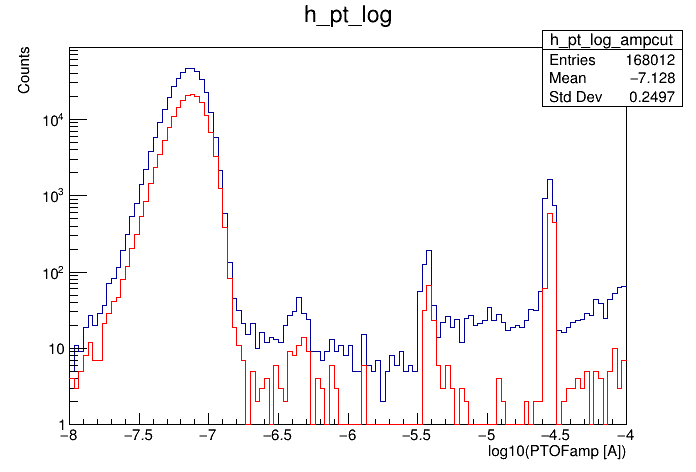

In [24]:
can = rt.TCanvas()
h_pt_log.Draw()
h_pt_log_ampcut.SetLineColor(rt.kRed)
h_pt_log_ampcut.Draw('sames')
can.SetLogy()
can.Draw()

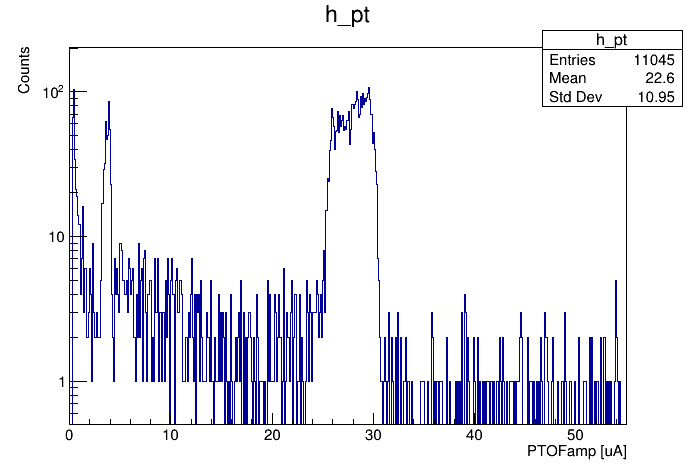

In [25]:
can = rt.TCanvas()
h_pt.Draw()
can.SetLogy()
can.Draw()

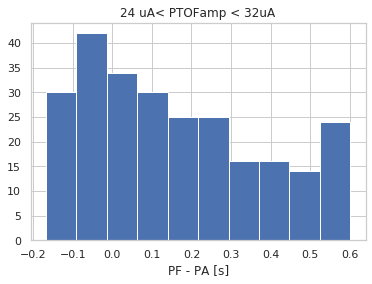

In [67]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 24e-6) & (OFamps[key][chan] < 32e-6)
plt.figure()
plt.hist(amp_diff[key][mask])#,bins=100,range=[-2,2])
#plt.yscale('log')
plt.xlabel('PF - PA [s]')
plt.title('24 uA< PTOFamp < 32uA')
plt.show()

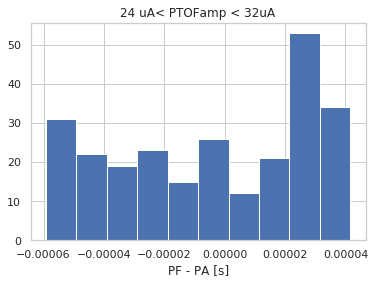

In [51]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 24e-6) & (OFamps[key][chan] < 32e-6)
plt.figure()
plt.hist(R2[key][mask])#,bins=100,range=[-2,2])
#plt.yscale('log')
plt.xlabel('PF - PA [s]')
plt.title('24 uA< PTOFamp < 32uA')
plt.show()

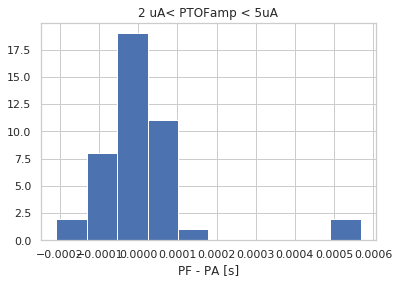

In [53]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
plt.figure()
plt.hist(R2[key][mask])#,bins=100,range=[-2,2])
#plt.yscale('log')
plt.xlabel('PF - PA [s]')
plt.title('2 uA< PTOFamp < 5uA')
plt.show()

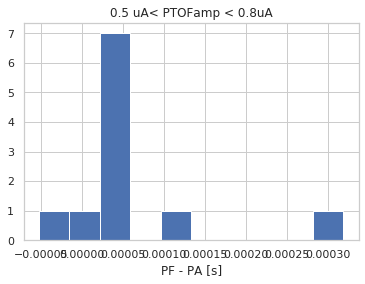

In [55]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.5e-6) & (OFamps[key][chan] < 0.8e-6)
plt.figure()
plt.hist(R2[key][mask])#,bins=100,range=[-2,2])
#plt.yscale('log')
plt.xlabel('PF - PA [s]')
plt.title('0.5 uA< PTOFamp < 0.8uA')
plt.show()

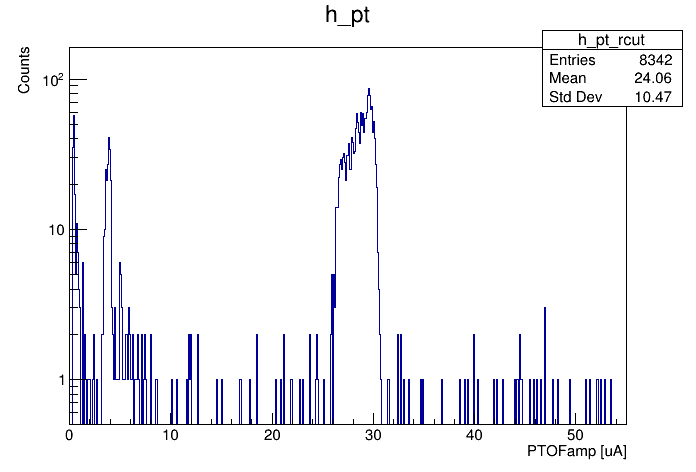

In [30]:
can = rt.TCanvas()
h_pt_rcut.Draw()
can.SetLogy()
can.Draw()

Warning in <TH1F::Rebin>: ngroup=2 is not an exact divider of nbins=275.
Warning in <TH1F::Rebin>: ngroup=2 is not an exact divider of nbins=275.


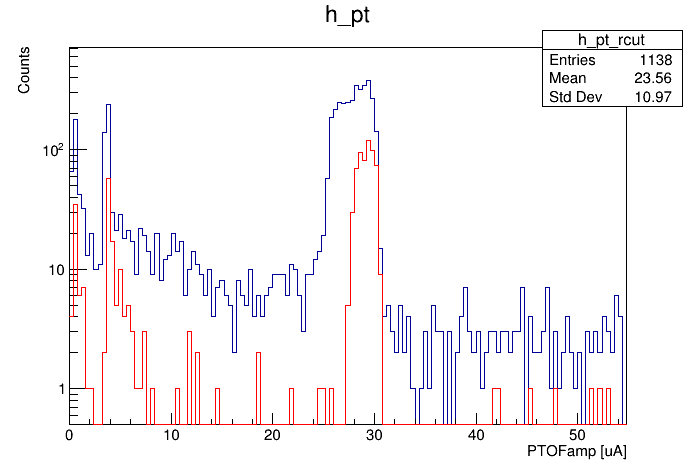

In [93]:
can = rt.TCanvas()
h_pt.Rebin(2)
h_pt.Draw()
h_pt_rcut.SetLineColor(rt.kRed)
h_pt_rcut.Rebin(2)
h_pt_rcut.Draw('sames')
can.SetLogy()
can.Draw()

In [124]:
total = 0
events_160ev = [] 
for idx, key in enumerate(series):
    if(idx !=1):
        continue
    key = series[idx]
    chan = 'PT'
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.5e-6) & (OFamps[key][chan] < 0.8e-6)
    print(EventNumber[idx][mask])
    events_160ev += (EventNumber[idx][mask]).astype(int).tolist()
    x = OFamps[key][chan][mask]
    print('%s : %d'%(key,len(x)))
    total += len(x)
print('Total =',total)
print(events_160ev)

[190520. 270629. 314408. 394145. 583078. 600518. 613262. 640546. 683343.
 720245. 800211.]
23231220_190923 : 11
Total = 11
[190520, 270629, 314408, 394145, 583078, 600518, 613262, 640546, 683343, 720245, 800211]


In [130]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.5e-6) & (OFamps[key][chan] < 0.8e-6)
x = OFamps[key][chan][mask]
y = R1[key][mask]
z = R2[key][mask]
print('%s : %d : %d : %d'%(key,len(x),len(y),len(z)))
print('event # : PTOF : R1 : R2')
for i in range(len(x)):
    print('%d : %d : %f : %f : %f'%(i,events_160ev[i],x[i],y[i],z[i]))

print((OFdelay[key][chan][mask][1]*1e6)/1.6)
print((OFamps[key][chan][mask][1]*1e6))
print(len(OFdelay[key][chan][mask]))

23231220_190923 : 11 : 11 : 11
event # : PTOF : R1 : R2
0 : 190520 : 0.000001 : -0.000042 : -0.000053
1 : 270629 : 0.000001 : 0.000365 : 0.000318
2 : 314408 : 0.000001 : 0.000008 : -0.000006
3 : 394145 : 0.000001 : 0.000034 : 0.000046
4 : 583078 : 0.000001 : 0.000048 : 0.000046
5 : 600518 : 0.000001 : 0.000011 : 0.000030
6 : 613262 : 0.000001 : 0.000043 : 0.000045
7 : 640546 : 0.000001 : -0.000278 : 0.000022
8 : 683343 : 0.000001 : -0.000040 : 0.000027
9 : 720245 : 0.000001 : 0.000005 : 0.000030
10 : 800211 : 0.000001 : -0.000107 : 0.000110
-325.0
0.6093224401237431
11


256
256


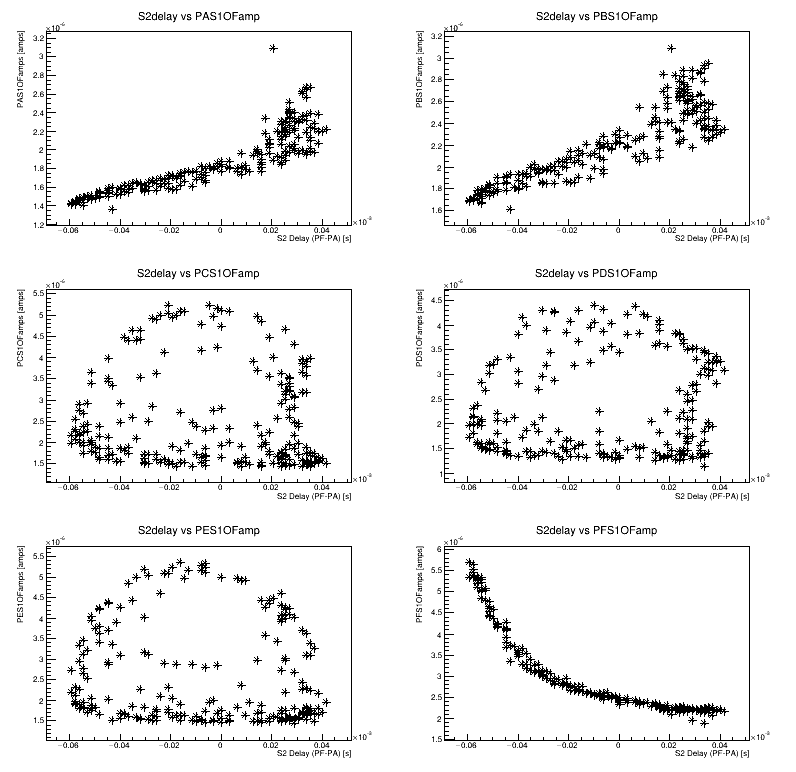

In [14]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 24e-6) & (OFamps[key][chan] < 32e-6)
# x = OFamps[key][chan][mask]
# y = R1[key][mask]
# z = R2[key][mask]
cans = rt.TCanvas('cans','cans',800,800)
cans.Divide(2,3)
dummy = 1
graphs = []
for c in channels:
    if(c == 'PT'):
        continue
    if('S2' in c):
        continue
    cans.cd(dummy)
    x = (R2[key][mask])
    y = (OFamps[key][c][mask])
    graphs.append(rt.TGraph(len(x),x,y))
    graphs[dummy-1].SetTitle('S2delay vs %sOFamp'%(c))
    graphs[dummy-1].GetXaxis().SetTitle('S2 Delay (PF-PA) [s]')
    graphs[dummy-1].GetYaxis().SetTitle('%sOFamps [amps]'%(c))
    graphs[dummy-1].Draw('AP*')
    dummy += 1
#can.SetLogy()
cans.Draw()
print(len(x))
print(len(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
256
256


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cans


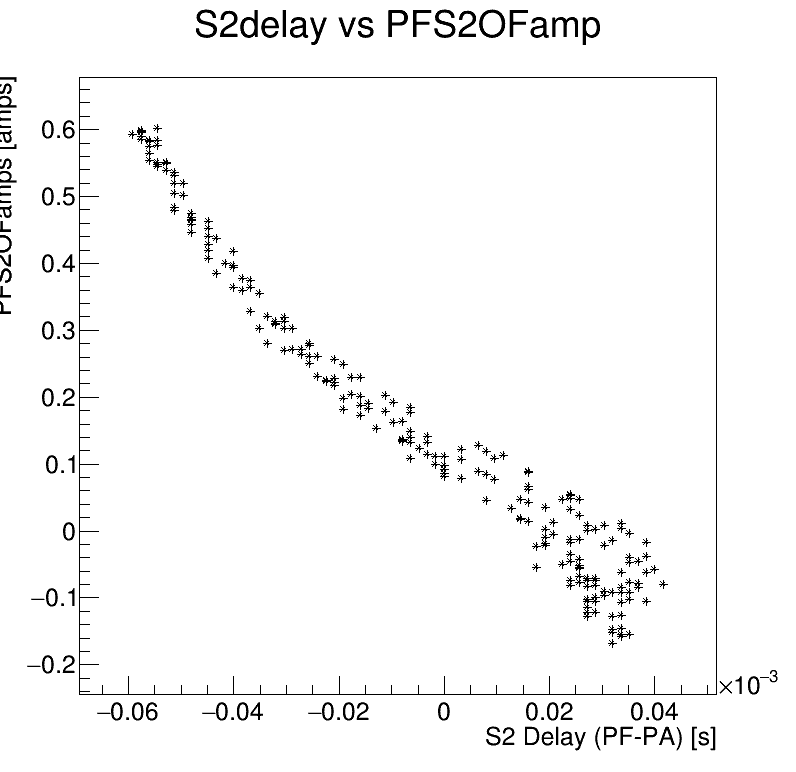

In [44]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 24e-6) & (OFamps[key][chan] < 32e-6)
# x = OFamps[key][chan][mask]
# y = R1[key][mask]
# z = R2[key][mask]
cans = rt.TCanvas('cans','cans',800,800)
#cans.Divide(2,3)
dummy = 1
graphs = []
x =  (R2[key][mask])#.tolist()
y = np.array([])
for i in range(len(x)):
    diff = (OFamps[key]['PFS2'][mask][i] - OFamps[key]['PAS2'][mask][i])/(OFamps[key]['PFS2'][mask][i] + OFamps[key]['PAS2'][mask][i])
    y = np.append(y,diff)
    #y.append(diff)

print(type(x))
print(type(y))
graphs.append(rt.TGraph(len(x),x,y))
graphs[dummy-1].SetTitle('S2delay vs %sOFamp'%(c))
graphs[dummy-1].GetXaxis().SetTitle('S2 Delay (PF-PA) [s]')
graphs[dummy-1].GetYaxis().SetTitle('%sOFamps [amps]'%(c))
graphs[dummy-1].Draw('AP*')

dummy += 1
#can.SetLogy()
cans.Draw()
print(len(x))
print(len(y))

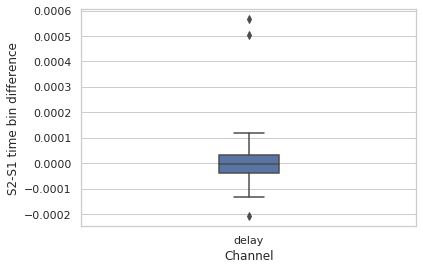

In [48]:

plot_data = {
    'delay' : x
}

# sort keys and values together
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(1)))

# almost verbatim from question
sns.set(context='notebook', style='whitegrid')
#sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.18)
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

# category labels
plt.xticks(plt.xticks()[0], sorted_keys)
plt.xlabel('Channel')
plt.ylabel('S2-S1 time bin difference')
plt.show()

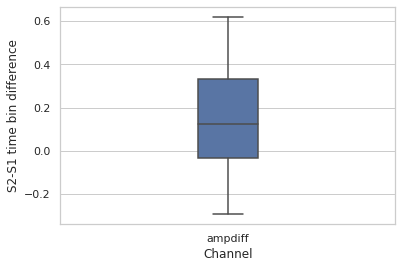

In [49]:

plot_data = {
    'ampdiff' : y
}

# sort keys and values together
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(1)))

# almost verbatim from question
sns.set(context='notebook', style='whitegrid')
#sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.18)
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

# category labels
plt.xticks(plt.xticks()[0], sorted_keys)
plt.xlabel('Channel')
plt.ylabel('S2-S1 time bin difference')
plt.show()

43
43


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cans


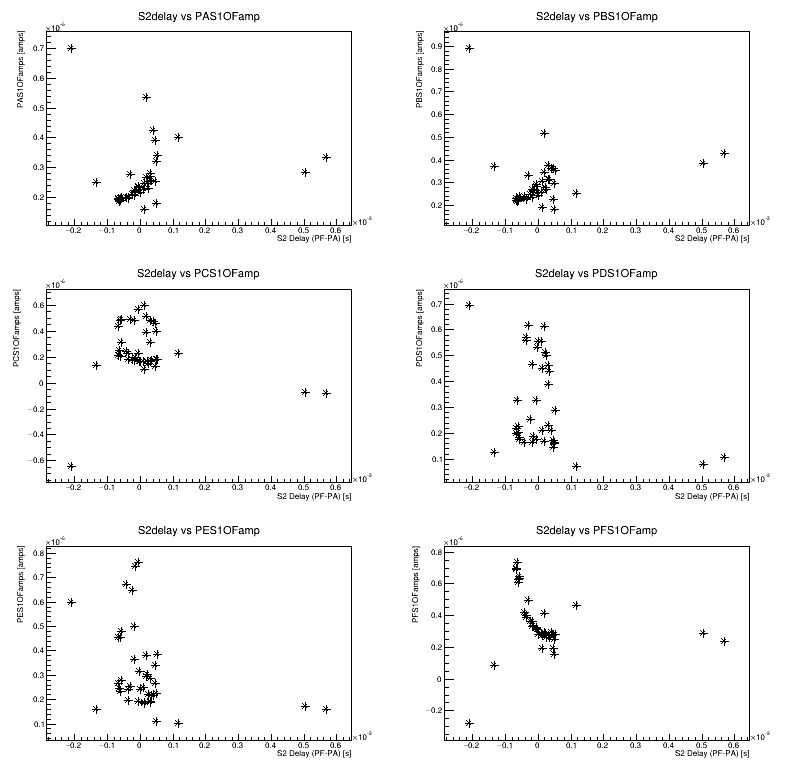

In [39]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
# x = OFamps[key][chan][mask]
# y = R1[key][mask]
# z = R2[key][mask]
cans = rt.TCanvas('cans','cans',800,800)
cans.Divide(2,3)
dummy = 1
graphs = []
for c in channels:
    if(c == 'PT'):
        continue
    if('S2' in c):
        continue
    cans.cd(dummy)
    x = (R2[key][mask])
    y = (OFamps[key][c][mask])
    graphs.append(rt.TGraph(len(x),x,y))
    graphs[dummy-1].SetTitle('S2delay vs %sOFamp'%(c))
    graphs[dummy-1].GetXaxis().SetTitle('S2 Delay (PF-PA) [s]')
    graphs[dummy-1].GetYaxis().SetTitle('%sOFamps [amps]'%(c))
    graphs[dummy-1].Draw('AP*')
    dummy += 1
#can.SetLogy()
cans.Draw()
print(len(x))
print(len(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
43
43


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cans


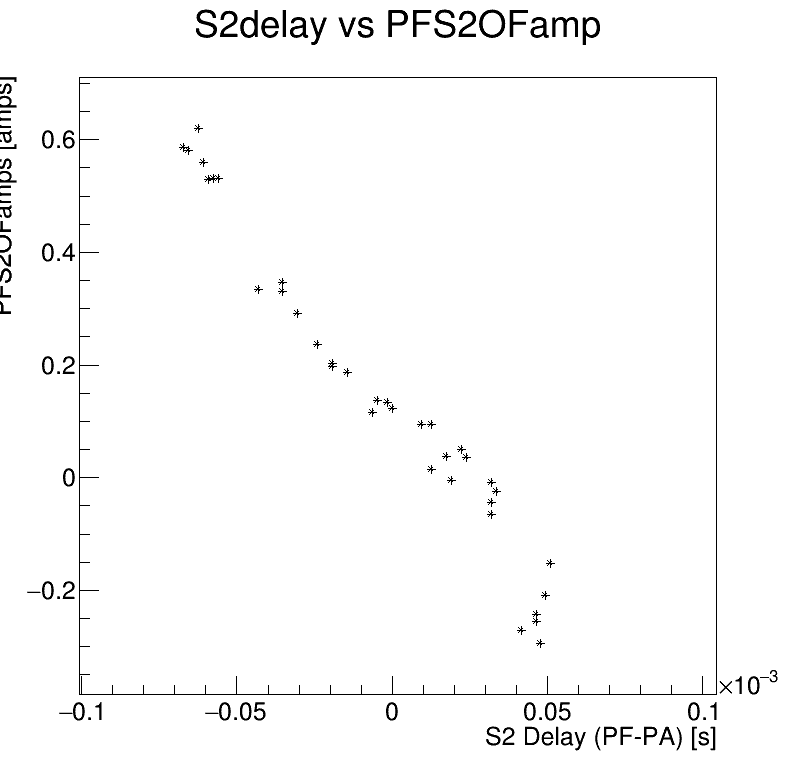

In [46]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 2e-6) & (OFamps[key][chan] < 5e-6)
# x = OFamps[key][chan][mask]
# y = R1[key][mask]
# z = R2[key][mask]
cans = rt.TCanvas('cans','cans',800,800)
#cans.Divide(2,3)
dummy = 1
graphs = []
x =  (R2[key][mask])#.tolist()
y = np.array([])
for i in range(len(x)):
    diff = (OFamps[key]['PFS2'][mask][i] - OFamps[key]['PAS2'][mask][i])/(OFamps[key]['PFS2'][mask][i] + OFamps[key]['PAS2'][mask][i])
    y = np.append(y,diff)
    #y.append(diff)

print(type(x))
print(type(y))
graphs.append(rt.TGraph(len(x),x,y))
graphs[dummy-1].GetXaxis().SetRangeUser(-0.1e-3,0.1e-3)
graphs[dummy-1].SetTitle('S2delay vs %sOFamp'%(c))
graphs[dummy-1].GetXaxis().SetTitle('S2 Delay (PF-PA) [s]')
graphs[dummy-1].GetYaxis().SetTitle('%sOFamps [amps]'%(c))
graphs[dummy-1].Draw('AP*')

dummy += 1
#can.SetLogy()
cans.Draw()
print(len(x))
print(len(y))

11
11


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cans


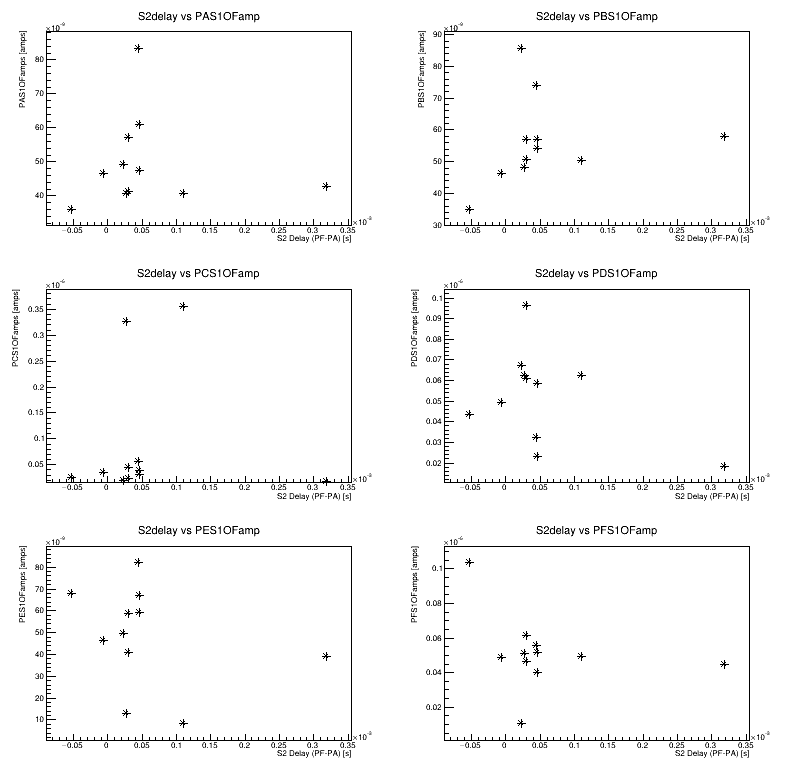

In [15]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.5e-6) & (OFamps[key][chan] < 0.8e-6)
# x = OFamps[key][chan][mask]
# y = R1[key][mask]
# z = R2[key][mask]
cans = rt.TCanvas('cans','cans',800,800)
cans.Divide(2,3)
dummy = 1
graphs = []
for c in channels:
    if(c == 'PT'):
        continue
    if('S2' in c):
        continue
    cans.cd(dummy)
    x = (R2[key][mask])
    y = (OFamps[key][c][mask])
    graphs.append(rt.TGraph(len(x),x,y))
    graphs[dummy-1].SetTitle('S2delay vs %sOFamp'%(c))
    graphs[dummy-1].GetXaxis().SetTitle('S2 Delay (PF-PA) [s]')
    graphs[dummy-1].GetYaxis().SetTitle('%sOFamps [amps]'%(c))
    graphs[dummy-1].Draw('AP*')
    dummy += 1
#can.SetLogy()
cans.Draw()
print(len(x))
print(len(y))

In [111]:
amps = {}
R2delays = np.array([])
chan = 'PT'
for c in channels:
    amps[c] = np.array([])
    
for idx, key in enumerate(series):

    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.5e-6) & (OFamps[key][chan] < 0.8e-6)
    R2delays = np.append(R2delays, R2[key][mask])
    for c in channels:
        x = OFamps[key][c][mask]
        amps[c] = np.append(amps[c], x)
    print('%s done'%(key))

23231221_015705 done
23231220_190923 done
23231220_122140 done
23231220_053358 done
23231220_012745 done
23231219_184002 done
23231219_110331 done
23231219_034952 done
23231218_223530 done
23231218_190035 done
23231218_152721 done
23231218_093255 done
23231217_212512 done
23231217_171613 done
23231217_135018 done


In [116]:
R2delays

array([-2.080e-05,  3.360e-05, -2.400e-05,  2.880e-05,  1.152e-04,
        4.960e-05, -5.280e-05,  3.184e-04, -6.400e-06,  4.640e-05,
        4.640e-05,  3.040e-05,  4.480e-05,  2.240e-05,  2.720e-05,
        3.040e-05,  1.104e-04, -3.952e-04,  3.520e-05,  2.112e-04,
        0.000e+00,  9.600e-06,  1.600e-06,  4.320e-05, -2.256e-04,
        2.560e-05, -3.216e-04,  4.256e-04,  8.640e-05, -5.280e-05,
        0.000e+00,  4.512e-04, -3.040e-05, -9.600e-06,  3.680e-05,
        3.680e-05, -2.240e-05, -5.920e-05,  8.960e-05, -1.920e-05,
       -2.720e-05,  5.120e-05, -5.280e-05,  3.472e-04,  1.120e-05,
        6.368e-04,  2.128e-04,  6.400e-05, -6.400e-05, -3.968e-04,
        9.120e-05,  1.040e-04, -8.000e-06,  6.080e-05,  4.640e-05,
       -2.240e-05, -5.280e-05, -6.720e-05, -6.720e-05,  5.120e-05,
       -1.072e-04, -2.928e-04, -5.600e-05,  2.336e-04, -8.800e-05,
        3.680e-05,  3.840e-05, -4.160e-04,  4.528e-04,  4.800e-05,
        3.680e-05,  1.920e-04, -5.424e-04, -9.600e-06])

74
74


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cans


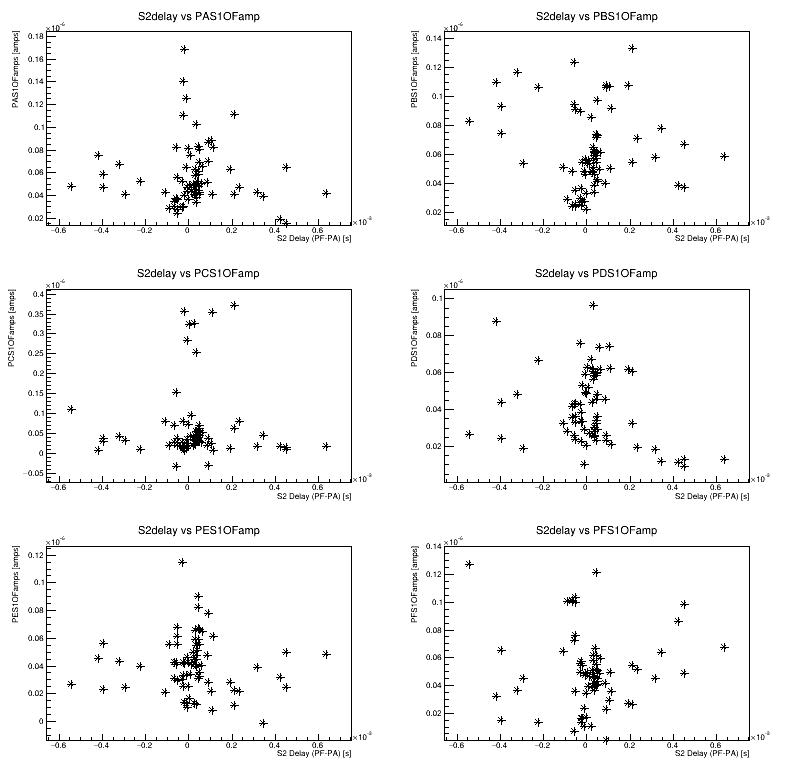

In [119]:
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.5e-6) & (OFamps[key][chan] < 0.8e-6)
# x = OFamps[key][chan][mask]
# y = R1[key][mask]
# z = R2[key][mask]
cans = rt.TCanvas('cans','cans',800,800)
cans.Divide(2,3)
dummy = 1
graphs = []
for c in channels:
    if(c == 'PT'):
        continue
    if('S2' in c):
        continue
    cans.cd(dummy)
    x = R2delays
    y = (amps[c])
    graphs.append(rt.TGraph(len(x),x,y))
    graphs[dummy-1].SetTitle('S2delay vs %sOFamp'%(c))
    graphs[dummy-1].GetXaxis().SetTitle('S2 Delay (PF-PA) [s]')
    graphs[dummy-1].GetYaxis().SetTitle('%sOFamps [amps]'%(c))
    graphs[dummy-1].Draw('AP*')
    dummy += 1
#can.SetLogy()
cans.Draw()
print(len(x))
print(len(y))

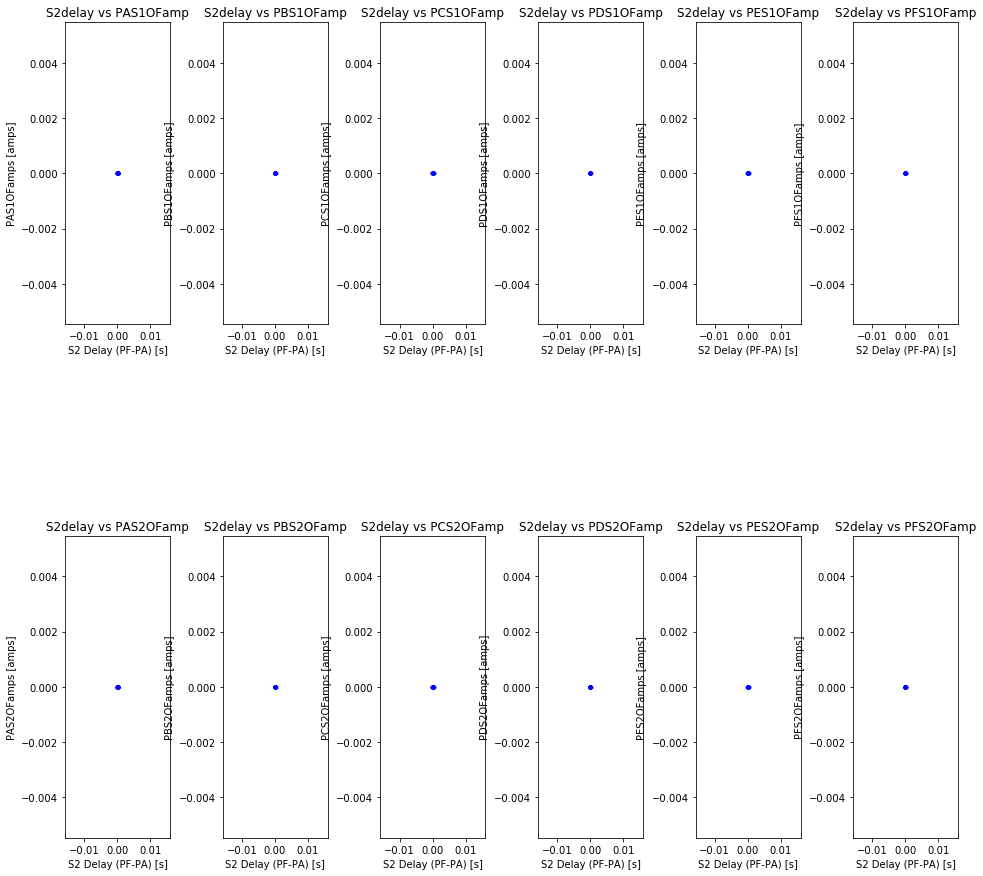

In [68]:
#check correlation
fig = plt.figure(figsize=(16.0,15.0))
fig.subplots_adjust(hspace=0.7, wspace=0.5)
dummy = 1
idx = 1
key = series[idx]
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.5e-6) & (OFamps[key][chan] < 0.8e-6)
# x = OFamps[key][chan][mask]
# y = R1[key][mask]
# z = R2[key][mask]
x = R2[key][mask]
for c in channels:
    if(c == 'PT'):
        continue
    plt.subplot(2,6,dummy)
    y = OFamps[key][c][mask]
    plt.scatter(x,y,marker='.',color='b')
    plt.xlabel('S2 Delay (PF-PA) [s]')
    plt.ylabel('%sOFamps [amps]'%(c))
    plt.title('S2delay vs %sOFamp'%(c))
    dummy+=1
plt.show()

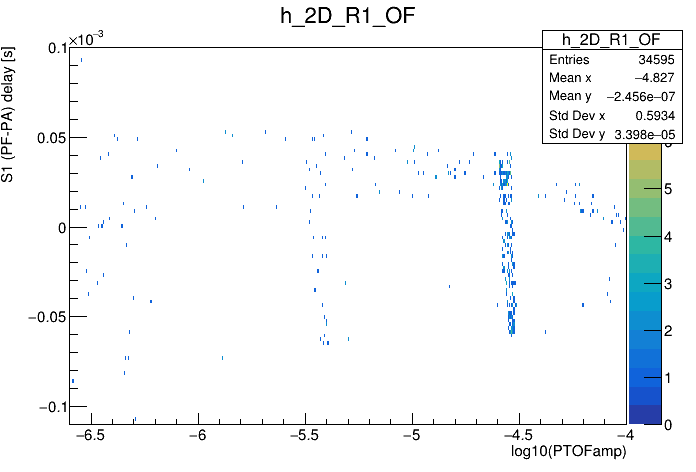

In [55]:
h_2D_R1_OF.Draw('colz')
can.SetLogy(0)
can.Draw()

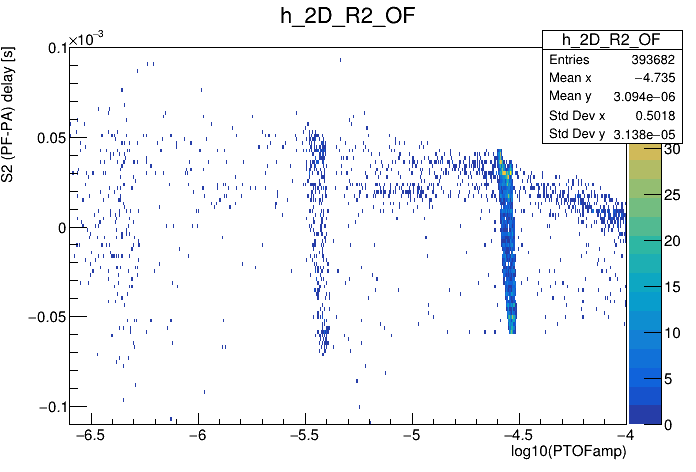

In [53]:
h_2D_R2_OF.Draw('colz')
can.Draw()

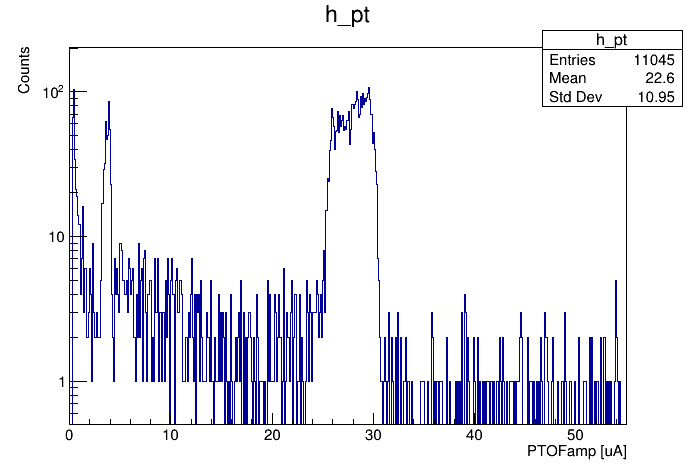

In [13]:
can = rt.TCanvas()
h_pt.Draw()
can.SetLogy()
can.Draw()

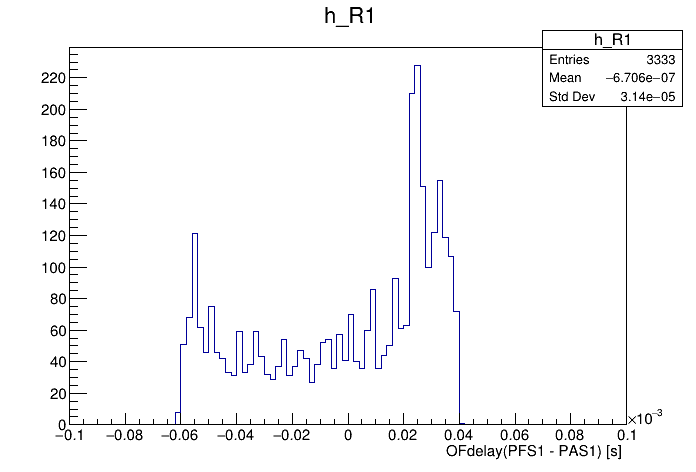

In [20]:
h_R1.Draw()
can.SetLogy(0)
can.Draw()

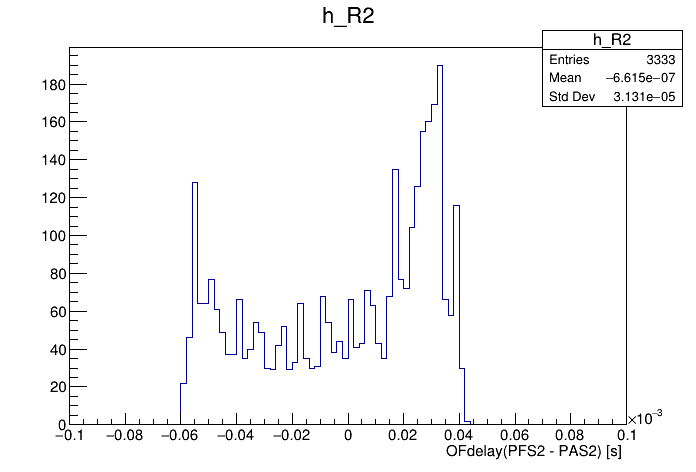

In [21]:
h_R2.Draw()
can.SetLogy(0)
can.Draw()

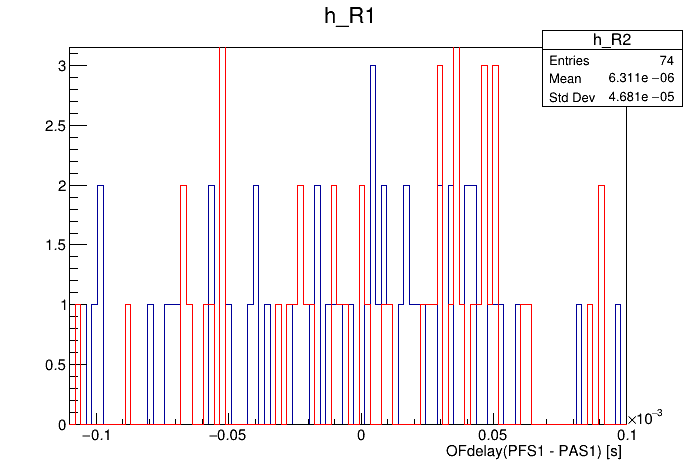

In [60]:
h_R1.Draw()
can.SetLogy(0)
h_R2.SetLineColor(rt.kRed)
h_R2.Draw('sames')
can.Draw()

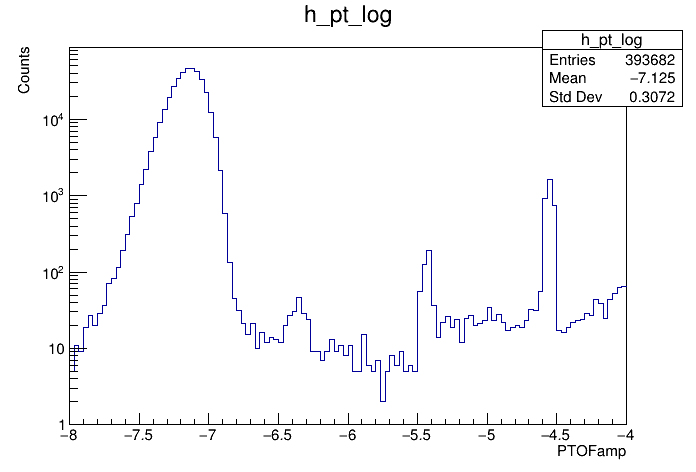